# **Abstract**
Liver cirrhosis is a prevalent health concern, particularly in North America, attributable to elevated alcohol consumption. The objective of this project is to develop a predictive model for liver cirrhosis based on an individual's lifestyle and health conditions. The disease is categorized into four stages:

Stage 1: Normal

Stage 2: Fatty Liver

Stage 3: Liver Fibrosis

Stage 4: Liver Cirrhosis

The primary goal is to accurately predict the specific stage of liver cirrhosis based on a dataset comprising both numerical and categorical features related to an individual's lifestyle and health.

**Objective:** The objective of this assignment was to apply advanced regression analysis and machine learning techniques to predict a target variable within a given dataset. The focus was on evaluating the significance of relationships between variables, assessing model assumptions, addressing multicollinearity, and identifying key predictors through variable importance and SHAP values.

**Methods:** I implemented Ordinary Least Squares (OLS) regression and utilized AutoML to streamline the model selection process. Hyperparameter tuning was conducted to optimize model performance. The SHAP (SHapley Additive exPlanations) framework was employed to interpret model predictions and assess the impact of each feature.

# **Data Set**
The data set consists of :

N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Triglycerides,Platelets,Prothrombin -
The independent variables

Stage - The dependent variable

There are a total of 418 observations.

In [119]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv -O cirrhosis_github.csv

# Import pandas
import pandas as pd

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('cirrhosis_github.csv')

# Display the first few rows of the DataFrame
print(df.head())


--2024-02-19 19:19:40--  https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30700 (30K) [text/plain]
Saving to: ‘cirrhosis_github.csv’

cirrhosis_github.cs 100%[===================>]  29.98K  --.-KB/s    in 0.002s  

2024-02-19 19:19:40 (12.6 MB/s) - ‘cirrhosis_github.csv’ saved [30700/30700]

   N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  21464   F       Y            Y       Y   
1    4500      C  D-penicillamine  20617   F       N            Y       Y   
2    1012      D  D-penicillamine  25594   M       N            N       N   
3    1925      D  D-penicillamine  19994   F       N            Y       Y   
4    1

In [120]:
df.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  21464   F       Y            Y       Y   
1    4500      C  D-penicillamine  20617   F       N            Y       Y   
2    1012      D  D-penicillamine  25594   M       N            N       N   
3    1925      D  D-penicillamine  19994   F       N            Y       Y   
4    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [121]:
!pip3 install h2o

In [57]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [58]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={"figure.figsize": (16, 8)})

In [59]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [60]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

4


In [61]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:48792..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb2y4tf_k
  JVM stdout: /tmp/tmpb2y4tf_k/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb2y4tf_k/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:48792
Connecting to H2O server at http://127.0.0.1:48792 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_o6sbr1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:48792
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [63]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [65]:
import pandas as pd
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [122]:
df.shape  # Shape of the dataframe - Here, we have 418 samples of data with 19 predictors and 1 result

(418, 19)

In [67]:
columns = list(df.columns)
print(columns)  # Name of all predictors and result

['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

In [123]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
categorical columns List- Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [124]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Create a DataFrame to show missing values
missing_data_info = pd.DataFrame({
    'Column': columns_with_missing,
    'Missing Values': df[columns_with_missing].isnull().sum(),
    'Percentage Missing': (df[columns_with_missing].isnull().sum() / len(df)) * 100
})

# Display the information about missing values
print("Columns with Missing Data:")
print(missing_data_info)


Columns with Missing Data:
                      Column  Missing Values  Percentage Missing
Drug                    Drug             106           25.358852
Ascites              Ascites             106           25.358852
Hepatomegaly    Hepatomegaly             106           25.358852
Spiders              Spiders             106           25.358852
Cholesterol      Cholesterol             134           32.057416
Copper                Copper             108           25.837321
Alk_Phos            Alk_Phos             106           25.358852
SGOT                    SGOT             106           25.358852
Tryglicerides  Tryglicerides             136           32.535885
Platelets          Platelets              11            2.631579
Prothrombin      Prothrombin               2            0.478469
Stage                  Stage               6            1.435407


In [125]:
# Impute missing values for numerical columns with mean
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [126]:
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

<ipython-input-127-38cd72d9124d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(), annot=True, cmap="Oranges"


<Axes: >

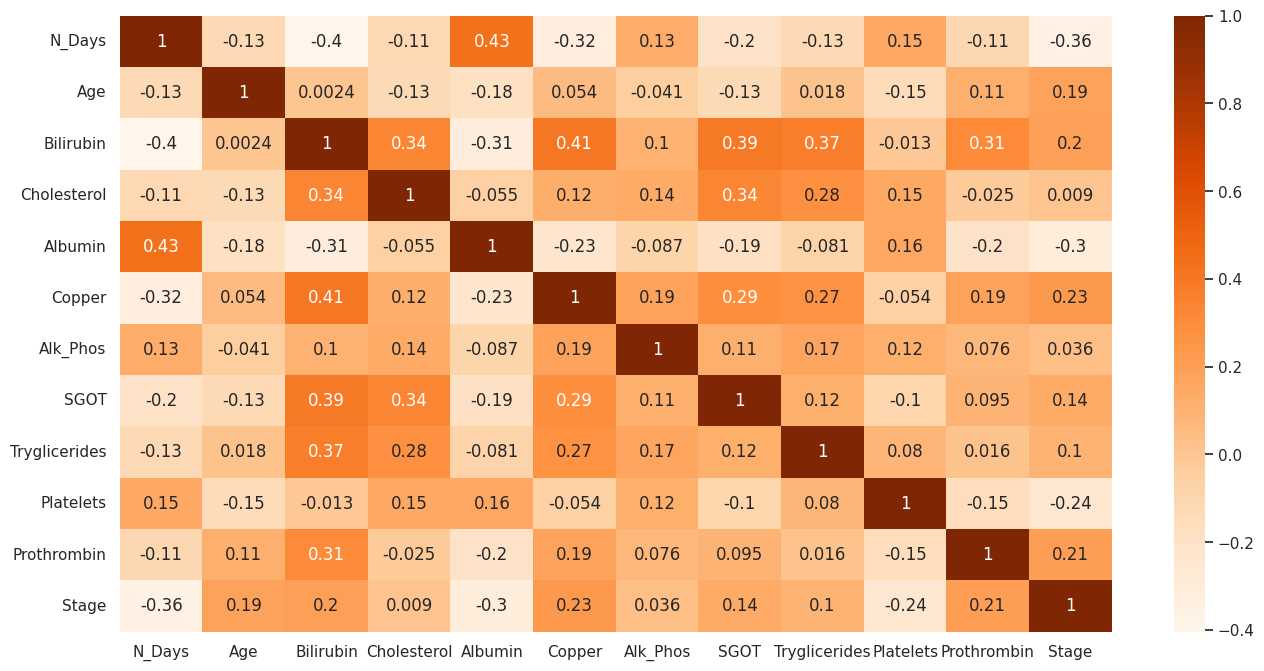

In [127]:
sns.heatmap(
    df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

Correlation Analysis:-

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, plotting each variable on the x and y axes. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends and identify strongly correlated variables (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

Below are the conclusions made from the above heatmap:-

High Positive Correlation: Cells with dark maroon color represent a high positive correlation. For example, we see this between Bilirubin and Cholesterol, Albumin and N_Days, suggesting that as one variable increases, so does the other.

High Negative Correlation: Light maroon cells show a high negative correlation. For instance, N_Days seems to have a moderately negative correlation with Age, indicating that as Age increases, N_Days decreases, or vice versa.

No or Weak Correlation: Cells that are closer to the neutral color (which appears to be light beige or grey in this heatmap) indicate little to no linear relationship between the variables.

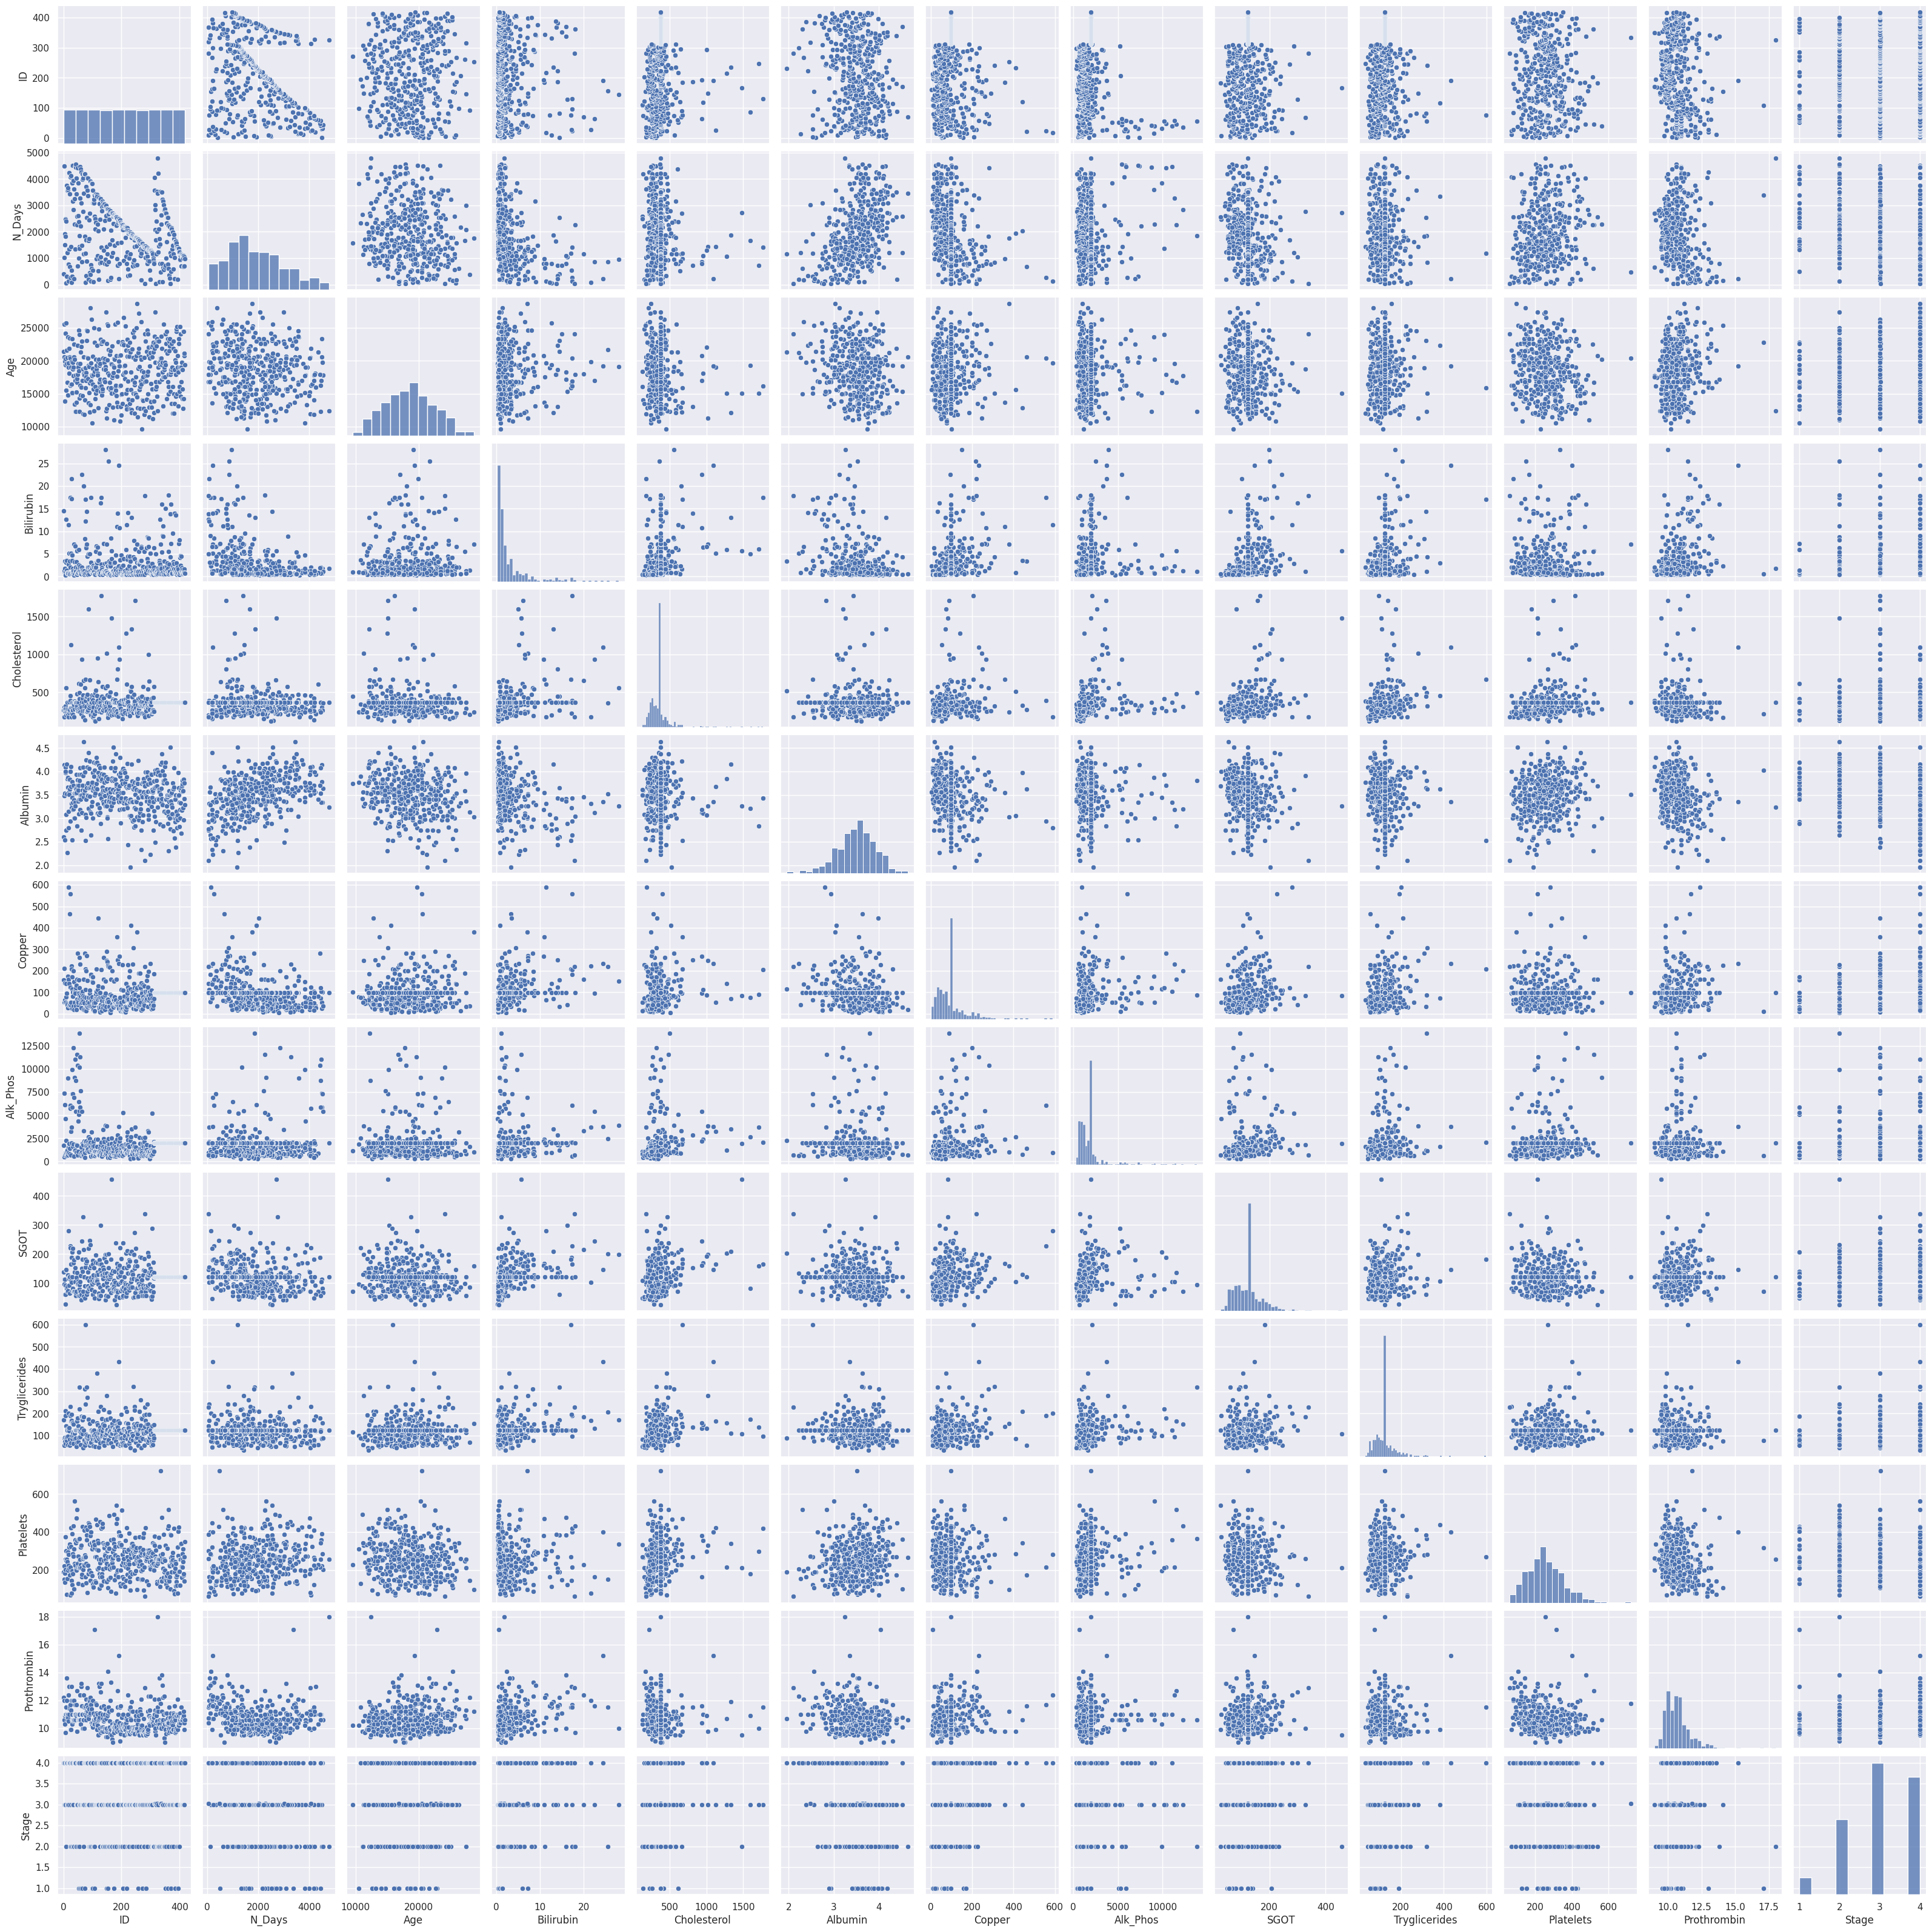

In [18]:
sns.pairplot(
    df
)  # All attributes are plotted against each other to see the pattern of distribution

Interpreting PairPlot
A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.

some insights based on the scatter plots and histograms in this pair plot:

Relationship between variables:

Some scatter plots show a potential correlation between variables, like Bilirubin and Stage, which seem to have a positive relationship as the points suggest a trend upwards.
Many scatter plots show a more cloud-like pattern, suggesting a weak or no linear correlation between those variables.
Distribution of variables:

The histograms on the diagonal show the distribution of each variable. For instance, Bilirubin seems to be right-skewed, with a few high-value outliers.
Albumin shows a more normally distributed pattern, with a slight left skew.
Outliers:

Scatter plots such as those involving Alk_Phos, SGOT, and Tryglicerides indicate the presence of potential outliers, as some points lie far from the main cluster.
Patterns and trends:

Non-linear patterns can be spotted in several plots, which may suggest that more complex relationships exist between the variables.
Potential predictors:

Variables like Bilirubin and Albumin could be potential predictors for the Stage variable, as they show some form of systematic relationship in the scatter plots.


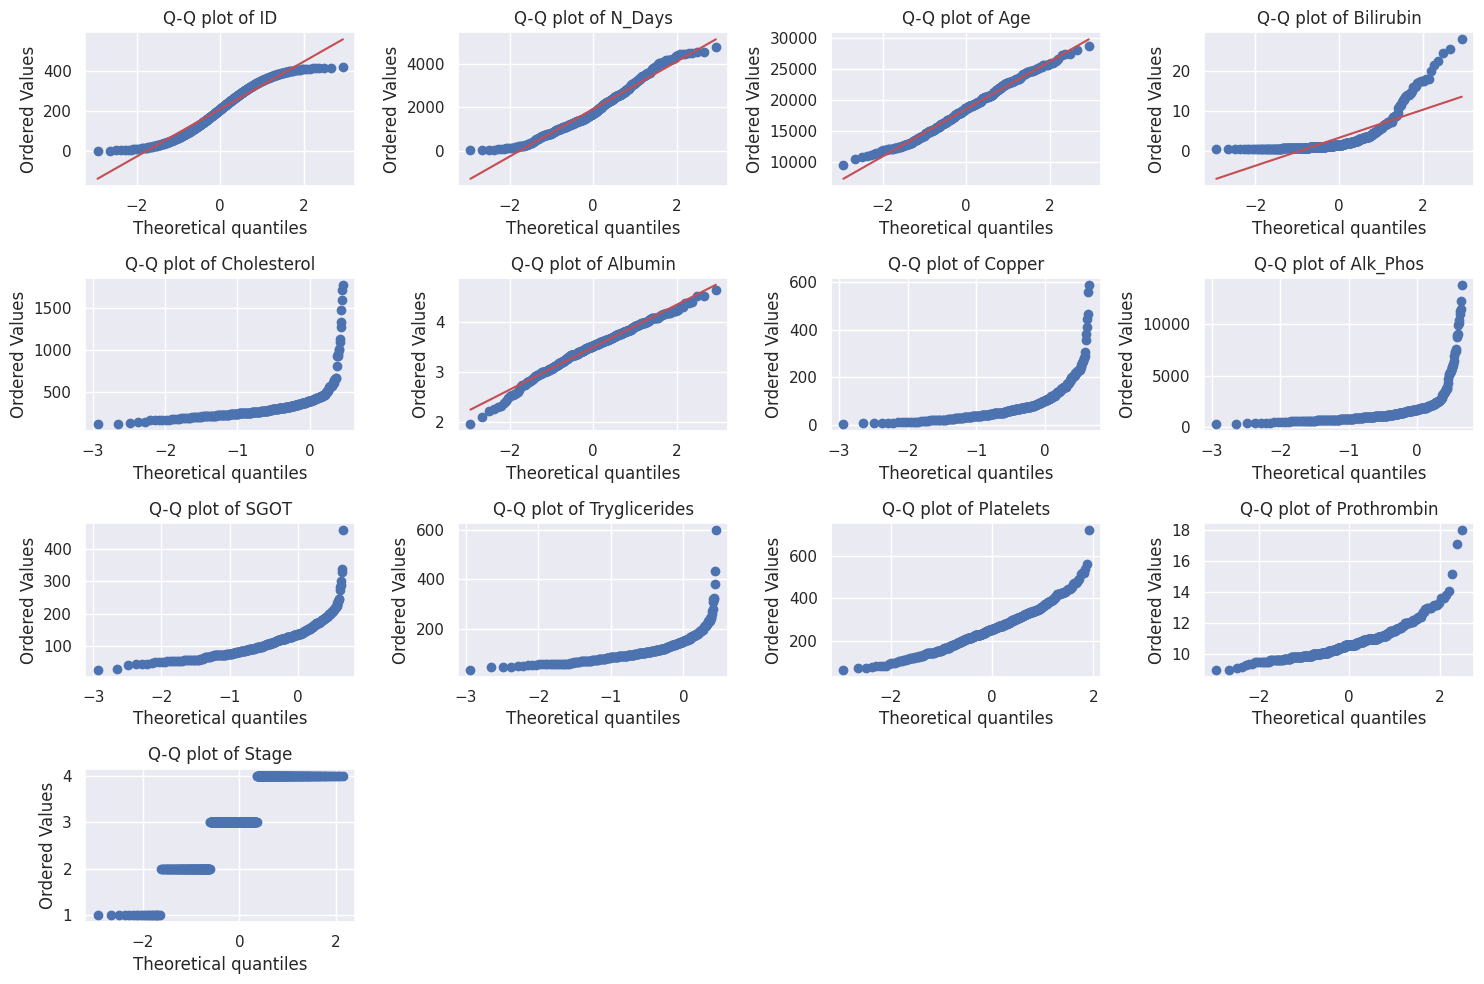

In [7]:
#likely distributions of the numeric variables
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the number of rows and columns needed based on the number of numeric columns
num_numeric_columns = len(numeric_columns)
num_rows = (num_numeric_columns - 1) // 4 + 1
num_cols = min(num_numeric_columns, 4)

# Plotting Q-Q plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()

N_Days: The plot suggests a right-skewed distribution with potential outliers at higher values.

Age: The plot shows that the age variable is somewhat normally distributed in the central quantiles but deviates at the tails, indicating potential outliers and skewness.

Bilirubin: Shows a pronounced right skew with potential outliers at higher values.

Cholesterol: This variable exhibits right skewness with outliers at the higher end.

Albumin: Appears to be normally distributed in the middle quantiles but with outliers at both the low and high ends.

Copper: The plot suggests a right-skewed distribution with several outliers at higher values.

Alk_Phos (alkaline phosphatase?): There is a strong right skew with many high-end outliers.

SGOT (serum glutamic-oxaloacetic transaminase?): Shows a right-skewed distribution with outliers at higher values.

Triglycerides: Right-skewed with outliers at the higher end.

Platelets: The distribution shows right skewness with several outliers at higher values.

Prothrombin: The plot appears somewhat normal in the central range but with outliers at both tails, particularly at higher values.

Stage: This appears to be an ordinal or categorical variable with distinct steps and outliers, and it's not normally distributed.

In [128]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your original DataFrame and 'Stage' is your target variable

# Create a copy of the DataFrame for OLS model preparation
df_ols = df.copy()

# Perform one-hot encoding on categorical variables in the copied DataFrame
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df_ols_encoded = pd.get_dummies(df_ols, columns=categorical_vars, drop_first=True)

# Define your independent variables (features) and dependent variable using the copied DataFrame
X_ols = df_ols_encoded.drop('Stage', axis=1)  # Exclude the target variable from the features
y_ols = df_ols_encoded['Stage']

# Fit the OLS model without a constant term
model_ols = sm.OLS(y_ols, X_ols).fit()

# Print out the summary statistics of the model
print(model_ols.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Stage   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              340.9
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                   3.91e-236
Time:                        19:20:46   Log-Likelihood:                         -466.92
No. Observations:                 418   AIC:                                      973.8
Df Residuals:                     398   BIC:                                      1055.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Make a copy of the DataFrame to ensure the original data is not affected
df_copy = df.copy()

# Perform one-hot encoding on categorical variables in the copied data
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df_encoded = pd.get_dummies(df_copy, columns=categorical_vars, drop_first=True)

# Define your features in the copied data, excluding the target variable 'Stage'
X = df_encoded.drop('Stage', axis=1)  # Make sure 'Stage' is the name of your target variable

# Initialize DataFrame to store VIF scores for the copied and processed data
vif_data_copied = pd.DataFrame()
vif_data_copied['Feature'] = X.columns

# Calculate VIF for each feature in the copied and processed data, excluding the target variable
vif_data_copied['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF scores for the copied and processed data, excluding the target variable
print(vif_data_copied)


           Feature        VIF
0           N_Days   6.858658
1              Age  26.856220
2        Bilirubin   3.019330
3      Cholesterol   6.483312
4          Albumin  63.230464
5           Copper   4.189286
6         Alk_Phos   2.656140
7             SGOT   9.443025
8    Tryglicerides   8.484402
9        Platelets   9.403848
10     Prothrombin  79.357914
11       Status_CL   1.227904
12        Status_D   2.690889
13    Drug_Placebo   1.704488
14           Sex_M   1.273076
15       Ascites_Y   1.957762
16  Hepatomegaly_Y   3.358517
17       Spiders_Y   1.568840
18         Edema_S   1.251139
19         Edema_Y   2.037920


In [141]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_ols_encoded is your one-hot encoded DataFrame from the previous steps

# List of columns to remove based on high p-values and your analysis
columns_to_remove = ['Cholesterol', 'Copper', 'Alk_Phos',
                      'Edema_S', 'Edema_Y']

# Remove the suggested columns from your DataFrame
df_reduced = df_ols_encoded.drop(columns=columns_to_remove, axis=1)

# Define your independent variables (features) and dependent variable for the reduced DataFrame
X_reduced = df_reduced.drop('Stage', axis=1)  # Exclude the target variable from the features
y_reduced = df_reduced['Stage']

# Fit the OLS model without a constant term to the reduced DataFrame
model_reduced = sm.OLS(y_reduced, X_reduced).fit()

# Print out the summary statistics of the reduced model
print(model_reduced.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Stage   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              457.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                   3.08e-242
Time:                        19:46:43   Log-Likelihood:                         -468.00
No. Observations:                 418   AIC:                                      966.0
Df Residuals:                     403   BIC:                                      1027.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Model Assumptions:

The residuals' pattern does not indicate heteroscedasticity, fulfilling the constant variance assumption of the residuals.
The Durbin-Watson statistic of 1.889 suggests a lack of autocorrelation among residuals, which is an assumption met by the model.
A condition number of 9.49e+04, although large, does not conclusively point to multicollinearity without further diagnostics such as variance inflation factors (VIF).
Regression Coefficients:

Coefficients’ signs (positive or negative) show the direction of the relationship between each predictor and the target variable. For instance, a positive Age coefficient suggests that as age increases, so does the 'Stage' variable, assuming other variables are held constant.
The magnitude of coefficients indicates the strength of the relationship. Hepatomegaly_Y has the highest coefficient (0.4332), showing a strong positive relationship with the 'Stage' variable.
Significance of Predictors:

Predictors with p-values less than 0.05, like N_Days, Age, Bilirubin, SGOT, Platelets, Prothrombin, Status_CL, Drug_Placebo, and Spiders_Y, are statistically significant and likely impactful to the 'Stage' variable.
Other predictors with higher p-values might not contribute significantly to the model and could be candidates for removal if model simplification is desired.
Model Diagnostics:

The Omnibus probability and the Jarque-Bera test suggest that the residuals may deviate from normality, given their significant p-values. This could imply the model may benefit from transformations or robust regression techniques.
Skewness is near zero, which is ideal, but a kurtosis of 2.993 suggests a flatter distribution than the normal curve.
Overall Fit and Multicollinearity:

An R-squared value of 0.945 indicates that the model explains a substantial portion of the variance in the 'Stage' variable.
However, the high condition number warns of potential multicollinearity, which might inflate the variance of coefficient estimates and reduce the reliability of the model. It's recommended to further investigate with VIF analysis.

<Axes: >

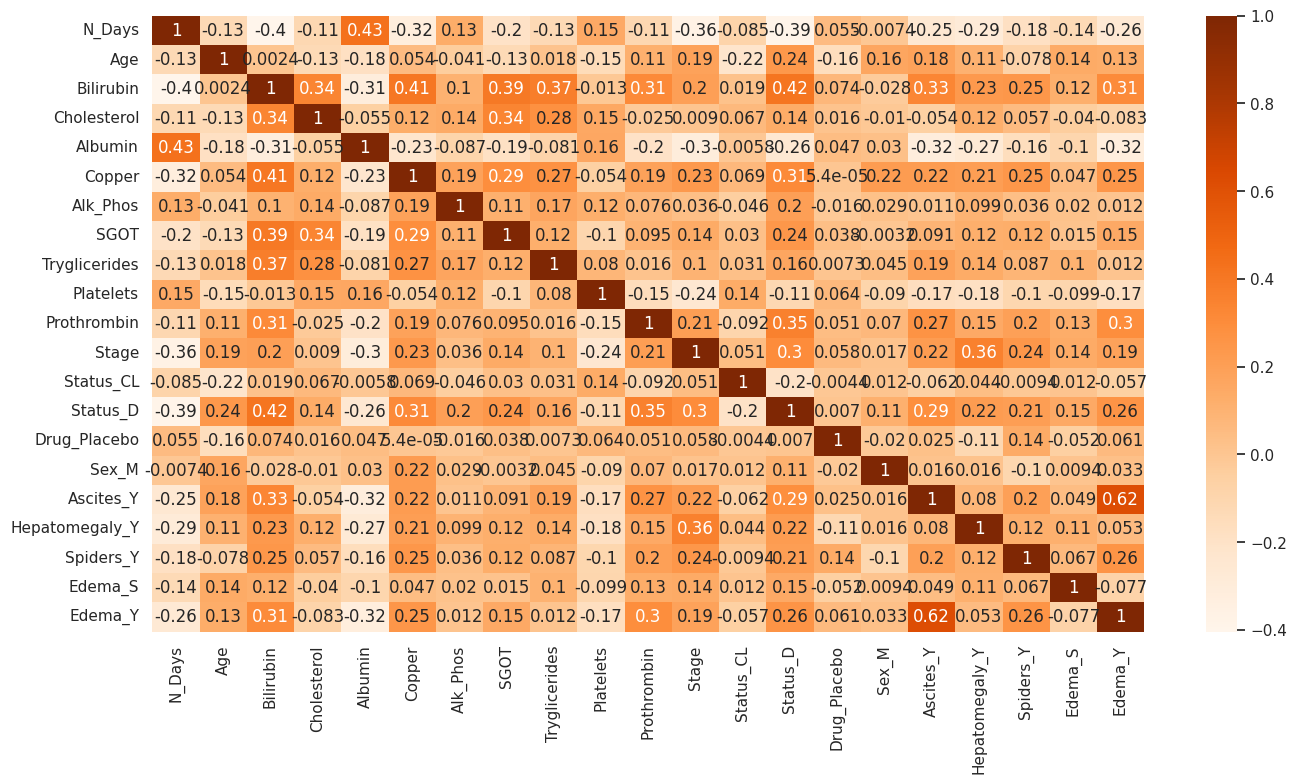

In [137]:
sns.heatmap(
    df_encoded.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

In [143]:
df1 = h2o.H2OFrame(
    df_reduced
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [144]:
df1.types

{'N_Days': 'int',
 'Age': 'int',
 'Bilirubin': 'real',
 'Albumin': 'real',
 'SGOT': 'real',
 'Tryglicerides': 'real',
 'Platelets': 'real',
 'Prothrombin': 'real',
 'Stage': 'real',
 'Status_CL': 'int',
 'Status_D': 'int',
 'Drug_Placebo': 'int',
 'Sex_M': 'int',
 'Ascites_Y': 'int',
 'Hepatomegaly_Y': 'int',
 'Spiders_Y': 'int'}

In [145]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df1_train, df1_test = df1.split_frame([pct_rows])

In [146]:
print(df1_train.shape)
print(df1_test.shape)

(328, 16)
(90, 16)


In [147]:
df1_train.head()

N_Days    Age    Bilirubin    Albumin    SGOT    Tryglicerides    Platelets    Prothrombin    Stage    Status_CL    Status_D    Drug_Placebo    Sex_M    Ascites_Y    Hepatomegaly_Y    Spiders_Y
--------  -----  -----------  ---------  ------  ---------------  -----------  -------------  -------  -----------  ----------  --------------  -------  -----------  ----------------  -----------
     400  21464         14.5       2.6   137.95              172      190               12.2        4            0           1               0        0            1                 1            1
    4500  20617          1.1       4.14  113.52               88      221               10.6        3            0           0               0        0            0                 1            1
    1012  25594          1.4       3.48   96.1                55      151               12          4            0           1               0        1            0                 0            0
    1925  19994          1.8       2.54   60.63               92      183               10.3        4            0           1               0        0            0                 1            1
    1504  13918          3.4       3.53  113.15               72      136               10.9        3            1           0               1        0            0                 1            1
    2503  24201          0.8       3.98   93                  63      257.025           11          3            0           1               1        0            0                 1            0
    1832  20284          1         4.09   60.45              213      204                9.7        3            0           0               1        0            0                 1            0
    2466  19379          0.3       4      28.38              189      373               11          3            0           1               1        0            0                 0            0
    2400  15526          3.2       3.08  144.15               88      251               11          2            0           1               0        0            0                 0            1
      51  25772         12.6       2.74  147.25              143      302               11.5        4            0           1               1        0            1                 0            1
[10 rows x 16 columns]

In [148]:
X = df1.columns
print(X)

['N_Days', 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y']


In [150]:
# Set target and predictor variables
y = "Stage"

In [151]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [152]:
aml.train(x=X, y=y, training_frame=df1_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20240219_195319_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          4851                   3            3            3             6             8             7.4375

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.36556283937780226
RMSE: 0.6046179284290223
MAE: 0.49409561549744957
RMSLE: 0.1735366324531248
Mean Residual Deviance: 0.36556283937780226

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.6005985034546981
RMSE: 0.7749829052661085
MAE: 0.6364427273124026
RMSLE: 0.21700956802155819
Mean Residual Deviance: 0.6005985034546981

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.638445  0.0573913   0.65859       0.562216      0.679663      0.696617      0.595137
mean_residual_deviance  0.610634  0.0759226   0.636919      0.503471      0.683639      0.667114      0.562027
mse                     0.610634  0.0759226   0.636919      0.503471      0.683639      0.667114      0.562027
r2                      0.19726   0.163162    0.0137159     0.40952       0.0564227     0.22482       0.28182
residual_deviance       0.610634  0.0759226   0.636919      0.503471      0.683639      0.667114      0.562027
rmse                    0.780182  0.0493767   0.798072      0.709557      0.826824      0.81677       0.749685
rmsle                   0.218629  0.00670824  0.211501      0.216588      0.222222      0.228365      0.214467

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 19:55:16  3.685 sec   0                  0.890514         0.710851        0.793016
    2024-02-19 19:55:16  3.700 sec   5                  0.797295         0.650773        0.63568
    2024-02-19 19:55:16  3.712 sec   10                 0.736697         0.612147        0.542722
    2024-02-19 19:55:16  3.719 sec   15                 0.692445         0.578606        0.479481
    2024-02-19 19:55:16  3.727 sec   20                 0.657085         0.544431        0.431761
    2024-02-19 19:55:16  3.735 sec   25                 0.628462         0.515565        0.394965
    2024-02-19 19:55:16  3.753 sec   30                 0.610485         0.499982        0.372692
    2024-02-19 19:55:16  3.759 sec   32                 0.604618         0.494096        0.365563

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
Hepatomegaly_Y  147.688                1                    0.20104
N_Days          98.5533                0.667309             0.134156
Age             94.2586                0.63823              0.12831
Albumin         63.8682                0.432455             0.0869409
Bilirubin       62.2583                0.421554             0.0847494
Prothrombin     62.1788                0.421016             0.0846412
SGOT            59.2392                0.401112             0.0806397
Spiders_Y       47.5246                0.321791             0.064693
Platelets       44.6665                0.302439             0.0608026
Tryglicerides   27.8359                0.188479             0.0378918
Drug_Placebo    8.27529                0.056

Understanding the Parameters
Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [153]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
GBM_grid_1_AutoML_2_20240219_195319_model_7              0.774983  0.600599  0.636443  0.21701                   0.600599
GBM_grid_1_AutoML_2_20240219_195319_model_11             0.776713  0.603283  0.636671  0.218862                  0.603283
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_195319  0.777081  0.603854  0.633042  0.218105                  0.603854
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_195319  0.777915  0.605152  0.636214  0.218592                  0.605152
StackedEnsemble_AllModels_1_AutoML_2_20240219_195319     0.778701  0.606376  0.636317  0.218971                  0.606376
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_195319  0.77992   0.608275  0.639662  0.218985                  0.608275
XGBoost_grid_1_AutoML_2_20240219_195319_model_21         0.780686  0.60947   0.640793  0.218967                  0.60947
GBM_grid_1_AutoML_2_20240219_195319_model_4              0.781201  0.610275  0.639385  0.219315                  0.610275
StackedEnsemble_AllModels_2_AutoML_2_20240219_195319     0.782002  0.611528  0.639054  0.21961                   0.611528
GLM_1_AutoML_2_20240219_195319                           0.783104  0.613252  0.634066  0.220565                  0.613252
GBM_grid_1_AutoML_2_20240219_195319_model_2              0.784709  0.615768  0.645631  0.219013                  0.615768
XGBoost_grid_1_AutoML_2_20240219_195319_model_19         0.785132  0.616431  0.639674  0.22012                   0.616431
GBM_grid_1_AutoML_2_20240219_195319_model_10             0.785265  0.616641  0.642985  0.219713                  0.616641
DRF_1_AutoML_2_20240219_195319                           0.785775  0.617443  0.648784  0.219067                  0.617443
XGBoost_grid_1_AutoML_2_20240219_195319_model_15         0.785813  0.617502  0.646839  0.220049                  0.617502
GBM_grid_1_AutoML_2_20240219_195319_model_1              0.786653  0.618822  0.651041  0.220883                  0.618822
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_195319  0.787519  0.620186  0.640877  0.221271                  0.620186
GBM_grid_1_AutoML_2_20240219_195319_model_9              0.791078  0.625805  0.649854  0.221766                  0.625805
GBM_grid_1_AutoML_2_20240219_195319_model_3              0.793951  0.630359  0.65424   0.22285                   0.630359
XGBoost_grid_1_AutoML_2_20240219_195319_model_49         0.794218  0.630782  0.655604  0.222855                  0.630782
GBM_grid_1_AutoML_2_20240219_195319_model_5              0.795802  0.6333    0.650361  0.222522                  0.6333
GBM_2_AutoML_2_20240219_195319                           0.799258  0.638814  0.658087  0.223032                  0.638814
GBM_3_AutoML_2_20240219_195319                           0.800128  0.640205  0.657045  0.223737                  0.640205
XGBoost_grid_1_AutoML_2_20240219_195319_model_28         0.800193  0.640309  0.66097   0.224137                  0.640309
XGBoost_grid_1_AutoML_2_20240219_195319_model_47         0.800612  0.64098   0.658321  0.224764                  0.64098
XGBoost_grid_1_AutoML_2_20240219_195319_model_9          0.800824  0.641319  0.647547  0.222413                  0.641319
StackedEnsemble_AllModels_3_AutoML_2_20240219_195319     0.801735  0.642779  0.660384  0.225494                  0.642779
StackedEnsemble_AllModels_4_AutoML_2_20240219_195319     0.801803  0.642887  0.661677  0.22513                   0.642887
DeepLearning_1_AutoML_2_20240219_195319                  0.804815  0.647727  0.651464  0.226263                  0.647727
GBM_grid_1_AutoML_2_20240219_195319_model_13             0.806986  0.651226  0.653903  0.224303                  0.651226
GBM_5_AutoML_2_20240219_195319                           0.807178  0.651537  0.669777  0.223995     

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

1) The best-performing model is GBM_grid_1_AutoML_2_20240219_195319_model_7	 with an RMSE score of 0.774983.

2) The second-best model is GBM_grid_1_AutoML_2_20240219_195319_model_11	 with an RMSE score of 0.776713.

The models are then listed in descending order based on their RMSE scores,

In [245]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'GBM_grid_1_AutoML_2_20240219_195319_model_7': 0,
 'GLM_1_AutoML_2_20240219_195319': 9}

In [241]:

best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20240219_195319_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          4851                   3            3            3             6             8             7.4375

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.36556283937780226
RMSE: 0.6046179284290223
MAE: 0.49409561549744957
RMSLE: 0.1735366324531248
Mean Residual Deviance: 0.36556283937780226

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.6005985034546981
RMSE: 0.7749829052661085
MAE: 0.6364427273124026
RMSLE: 0.21700956802155819
Mean Residual Devianc

In [242]:
best_model.algo

'gbm'

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

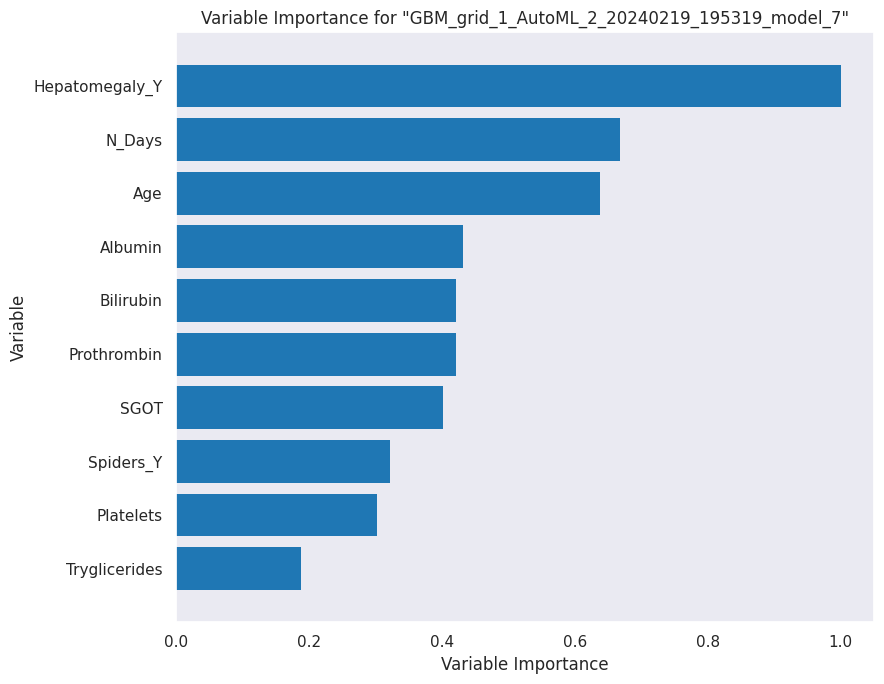

In [238]:
explain_model = aml.explain(frame = df1_test, figsize = (9,7),include_explanations=['varimp'])

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-158-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


9
glm


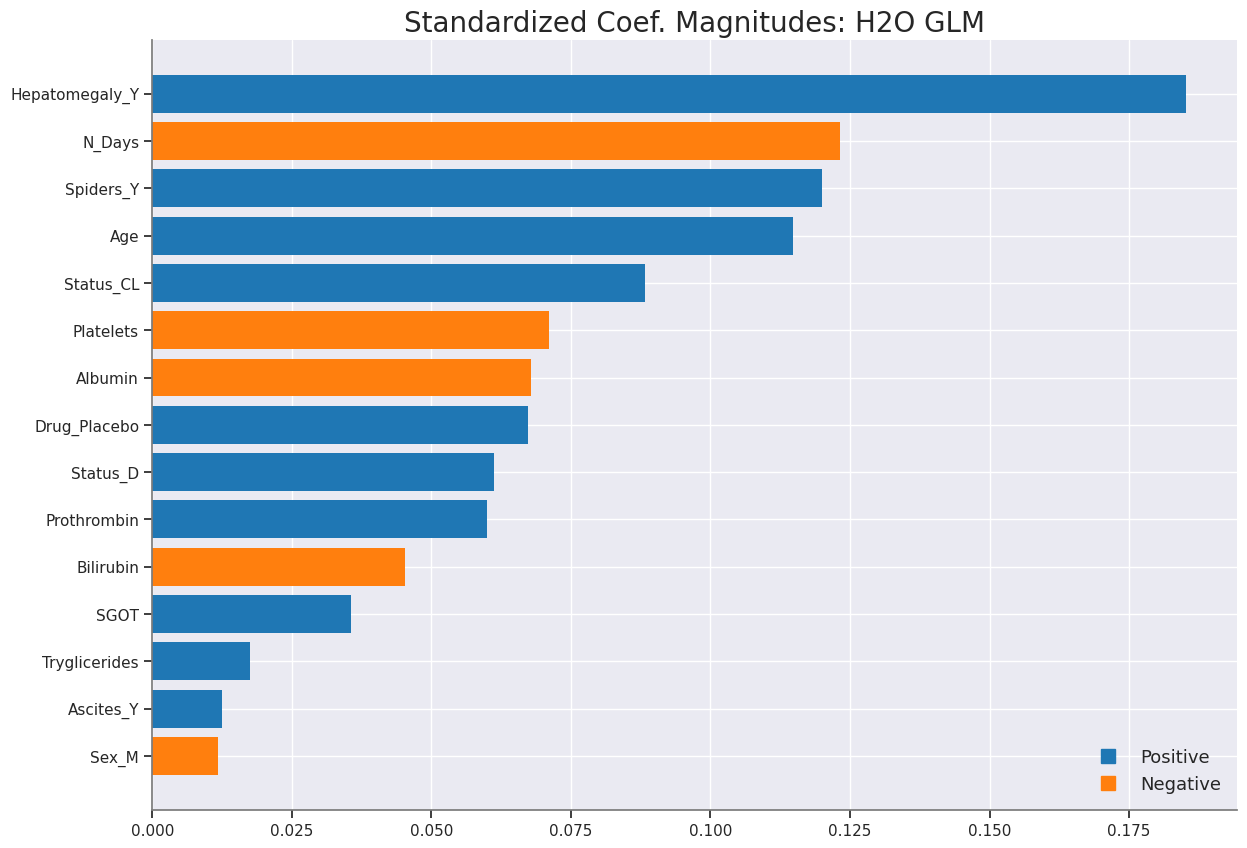

In [158]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [159]:
print(best_model.rmse(train=True))

0.6046179284290223


In [239]:
mod_perf = best_model.model_performance(df1_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.570709460230172,
 'rmse': 0.7554531489312702,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [240]:
predictions = best_model.predict(df1_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [163]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
     predict
0   3.432749
1   2.795477
2   3.171589
3   3.708121
4   2.521195
..       ...
85  3.452032
86  3.446469
87  3.093747
88  3.752505
89  3.121163

[90 rows x 1 columns]


In [164]:
y_test = h2o.as_list(df1_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Stage
0     4.0
1     3.0
2     4.0
3     4.0
4     2.0
..    ...
85    3.0
86    3.0
87    3.0
88    3.0
89    3.0

[90 rows x 1 columns]

In [165]:
print(X)

['N_Days', 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Status_CL', 'Status_D', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y']


Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

from h2o.estimators.glm import H2OGeneralizedLinearEsti

In [166]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

cirrhosis_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
cirrhosis_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
cirrhosis_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
cirrhosis_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

The first model, "cirrhosis_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
The second model, "cirrhosis_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [167]:
cirrhosis_glm.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708365499452_58


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              15                            15                             1                       py_281_sid_ae5d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5339375621814875
RMSE: 0.7307103134495143
MAE: 0.5911372672686621
RMSLE: 0.2055458575113701
Mean Residual Deviance: 0.5339375621814875
R^2: 0.32670007545615065
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 260.10922326209675
Residual deviance: 175.13152039552787
AIC: 759.0114278935481

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.6046610763877778
RMSE: 0.7775995604344037
MAE: 0.6337888850373579
RMSLE: 0.21679060499542527
Mean Residual Deviance: 0.6046610763877778
R^2: 0.23751710697567974
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 261.5819875220091
Residual deviance: 198.3288330551911
AIC: 799.8110820068616

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.636102  0.0538738  0.574587      0.609412      0.720293      0.635199      0.641019
mean_residual_deviance  0.609279  0.0928904  0.521548      0.550907      0.762166      0.603329      0.608447
mse                     0.609279  0.0928904  0.521548      0.550907      0.762166      0.603329      0.608447
null_deviance           52.3164   9.09489    44.6084       53.5246       41.5277       59.5195       62.4017
r2                      0.219902  0.132679   0.252231      0.365348      0.00958433    0.194626      0.277722
residual_deviance       39.6658   6.41732    32.8575       33.6053       40.3948       47.663        43.8082
rmse                    0.778842  0.0579356  0.722183      0.742231      0.873021      0.776743      0.78003
rmsle                   0.217325  0.0161116  0.200866      0.210828      0.242536      0.209599      0.222795

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -------------------
    2024-02-19 20:04:47  0.000 sec   0             260.10922322912785         0.7930159244790483
    2024-02-19 20:04:47  0.005 sec   1                                                            0.7307103134495143  0.5339375621814875   0.5911372672686621  0.32670007545615065

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
Hepatomegaly_Y  0.231473               1                    0.159809
Age             0.159191               0.687727             0.109905
N_Days          0.157536               0.680581             0.108763
Spiders_Y       0.152725               0.659795             0.105441
Status_CL       0.123064               0.531653             0.084963
Bilirubin       0.112982               0.4881               0.0780027
Drug_Placebo    0.104406               0.451052             0.0720821
Platelets       0.0787578              0.340245             0.0543743
Prothrombin     0.078565               0.339413             0.0542412
Status_D        0.0670259              0.289562         

# Ridge Regularization

In [168]:
cirrhosis_glm_regularization_ridge.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708365499452_59


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 3.442E-4 )  15                            15                             1                       py_281_sid_ae5d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5339375914261952
RMSE: 0.7307103334606643
MAE: 0.5911417153837571
RMSLE: 0.2055485285874903
Mean Residual Deviance: 0.5339375914261952
R^2: 0.3267000385783191
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 260.10922326209675
Residual deviance: 175.13152998779205
AIC: 759.0114458586896

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.5857208907130639
RMSE: 0.7653240429472106
MAE: 0.6196872274087103
RMSLE: 0.21361270372125388
Mean Residual Deviance: 0.5857208907130639
R^2: 0.2614008463655988
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 261.6033591422679
Residual deviance: 192.11645215388495
AIC: 789.372575047549

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.621795  0.0623364  0.632675      0.707462      0.532327      0.612942      0.623568
mean_residual_deviance  0.588014  0.120123   0.547513      0.75328       0.426738      0.573956      0.638584
mse                     0.588014  0.120123   0.547513      0.75328       0.426738      0.573956      0.638584
null_deviance           52.3207   3.82647    51.7745       49.9784       48.6863       52.5572       58.607
r2                      0.25479   0.136351   0.36474       0.0345768     0.368067      0.275045      0.23152
residual_deviance       38.4233   7.4924     32.3033       48.2099       30.2984       37.8811       43.4237
rmse                    0.763565  0.0789235  0.739941      0.867917      0.653252      0.757599      0.799115
rmsle                   0.213394  0.0212113  0.21388       0.241114      0.181396      0.215172      0.215406

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-02-19 20:05:06  0.000 sec   0             260.10922322912785         0.7930159244790483
    2024-02-19 20:05:06  0.002 sec   1                                                            0.7307103334606643  0.5339375914261952   0.5911417153837571  0.3267000385783191

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
Hepatomegaly_Y  0.231405               1                    0.159841
Age             0.159113               0.687595             0.109906
N_Days          0.157471               0.680499             0.108772
Spiders_Y       0.152672               0.659764             0.105457
Status_CL       0.123008               0.53157              0.0849667
Bilirubin       0.112839               0.487627             0.0779428
Drug_Placebo    0.104341               0.450901             0.0720725
Platelets       0.0787514              0.340319             0.0543968
Prothrombin     0.0785235              0.339334             0.0542395
Status_D        0.0670176  

The regularization in the GLM model, specifically Ridge regularization, has resulted in a slight improvement in the model's ability to generalize, as evidenced by the changes in various metrics when comparing the non-regularized and regularized models:

MSE (Mean Squared Error): The MSE has decreased from 0.6047 in the non-regularized model to 0.5857 in the regularized model, indicating an improvement of approximately 0.468%. A lower MSE value suggests that the regularized model has a smaller average squared difference between the observed actual outcomes and the outcomes predicted by the model.

RMSE (Root Mean Squared Error): The RMSE has been reduced from 0.7776 to 0.7653, which is an improvement of about 0.234%. RMSE is a standard way to measure the error of a model in predicting quantitative data. The decrease in RMSE indicates that the regularized model predictions are closer to the actual values.

MAE (Mean Absolute Error): The MAE has improved from 0.6338 in the non-regularized model to 0.6197 in the regularized model, showing an improvement of roughly 0.298%. MAE measures the average magnitude of errors in a set of predictions, without considering their direction. The reduction in MAE suggests that the regularized model has, on average, smaller errors in prediction.

RMSLE (Root Mean Squared Logarithmic Error): Although the RMSLE has also improved, the change is less pronounced. This metric is particularly useful when you want to penalize underestimates more than overestimates.

Residual Deviance and AIC (Akaike Information Criterion): Both of these metrics have shown improvement in the regularized model, indicating better model fit and complexity balance.

R^2 (R-squared): The R-squared value has seen a slight increase from 0.2375 to 0.2614 with regularization. This metric represents the proportion of variance for the dependent variable that's explained by the independent variables in the model. A higher R-squared value in the regularized model suggests it accounts for a greater proportion of the variance in the data.

In summary, the introduction of Ridge regularization to the GLM model has enhanced its generalization capability, as indicated by the improvements across several key performance metrics. This suggests that the regularization helped in mitigating overfitting, making the model more robust and better at predicting new, unseen data.

# Lasso Regularization

In [169]:
cirrhosis_glm_regularization_lasso.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708365499452_60


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 3.442E-4 )  15                            15                             1                       py_281_sid_ae5d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5339404816205691
RMSE: 0.7307123111187939
MAE: 0.5911516751872232
RMSLE: 0.20556995621064425
Mean Residual Deviance: 0.5339404816205691
R^2: 0.32669639401799655
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 260.10922326209675
Residual deviance: 175.13247797154665
AIC: 759.0132213118588

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.5969974480451072
RMSE: 0.7726560994680022
MAE: 0.6279134143655286
RMSLE: 0.21509531773576035
Mean Residual Deviance: 0.5969974480451072
R^2: 0.247181009181343
Null degrees of freedom: 327
Residual degrees of freedom: 312
Null deviance: 264.7639724344103
Residual deviance: 195.81516295879516
AIC: 795.627357386831

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.627672  0.0456799  0.694248      0.639527      0.609395      0.569044      0.626143
mean_residual_deviance  0.59774   0.0879462  0.703231      0.655189      0.539565      0.483562      0.607152
mse                     0.59774   0.0879462  0.703231      0.655189      0.539565      0.483562      0.607152
null_deviance           52.9528   11.3732    63.6136       58.1147       55.6471       53.6543       33.7343
r2                      0.213619  0.0977735  0.202592      0.225995      0.243501      0.33325       0.0627573
residual_deviance       39.163    7.58857    50.6326       42.5873       36.6904       34.3329       31.5719
rmse                    0.771433  0.057354   0.838589      0.809437      0.734551      0.695386      0.7792
rmsle                   0.214507  0.017204   0.232619      0.231728      0.197878      0.197812      0.212497

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -------------------
    2024-02-19 20:05:14  0.000 sec   0             260.10922322912785         0.7930159244790483
    2024-02-19 20:05:14  0.003 sec   1                                                            0.7307123111187939  0.5339404816205691   0.5911516751872232  0.32669639401799655

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
Hepatomegaly_Y  0.231422               1                    0.160715
Age             0.158569               0.685193             0.110121
N_Days          0.157122               0.678943             0.109116
Spiders_Y       0.152427               0.658653             0.105855
Status_CL       0.122503               0.52935              0.0850743
Bilirubin       0.111516               0.481873             0.0774442
Drug_Placebo    0.103823               0.44863              0.0721015
Platelets       0.0783818              0.338696             0.0544335
Prothrombin     0.0779615              0.33688              0.0541416
Status_D        0.0665819 

# Which Regularization Method Helps ?
Non-Regularized Model:
MSE (Cross-Validation): 0.6047
RMSE (Cross-Validation): 0.7776
MAE (Cross-Validation): 0.6338
RMSLE (Cross-Validation): 0.2168
R^2 (Cross-Validation): 0.2375
Ridge-Regularized Model:
MSE (Cross-Validation): 0.5857
RMSE (Cross-Validation): 0.7727
MAE (Cross-Validation): 0.6197
RMSLE (Cross-Validation): 0.2136
R^2 (Cross-Validation): 0.2614
Lasso-Regularized Model:
MSE (Cross-Validation): 0.5970
RMSE (Cross-Validation): 0.7727
MAE (Cross-Validation): 0.6279
RMSLE (Cross-Validation): 0.2151
R^2 (Cross-Validation): 0.2472
Comparative Analysis:
MSE & RMSE: Both the Ridge and Lasso regularization methods showed an improvement in MSE and RMSE compared to the non-regularized model, with Ridge regularization providing a slightly better reduction in MSE.
MAE & RMSLE: Similar to MSE and RMSE, both regularization methods improved MAE and RMSLE over the non-regularized model. Ridge regularization resulted in slightly lower MAE and RMSLE values compared to Lasso.
R^2: The R^2 value, which indicates the proportion of variance in the dependent variable that is predictable from the independent variables, improved with Ridge regularization compared to the non-regularized model. Lasso regularization also resulted in an improvement over the non-regularized model but was slightly less effective than Ridge in this case.
Conclusion:
Ridge regularization appears to be more beneficial for this particular dataset, as it slightly improved the model's performance across various metrics on cross-validation data. This suggests that Ridge regularization helped the model generalize better to new data by effectively managing multicollinearity among the predictors.

Lasso regularization also improved the model's performance compared to the non-regularized model but was not as effective as Ridge regularization. One of the characteristics of Lasso regularization is feature selection, where it can reduce some coefficients to zero, effectively selecting a simpler model. Depending on the specific use case and the importance of feature selection, Lasso could still be a valuable regularization technique, even if it does not lead to the highest R^2 value.

In [171]:
lambda_search = cirrhosis_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df1_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [172]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708365499452_61


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.004127 )  nlambda = 100, lambda.max = 0.6883, lambda.min = 0.004127, lambda.1se = -1.0  15                            14                             56                      py_281_sid_ae5d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5340450764091439
RMSE: 0.7307838780440794
MAE: 0.5914466269763401
RMSLE: 0.20571820930074844
Mean Residual Deviance: 0.5340450764091439
R^2: 0.3265644990770087
Null degrees of freedom: 327
Residual degrees of freedom: 313
Null deviance: 260.10922326209675
Residual deviance: 175.16678506219918
AIC: 757.0774676689454

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  ------------------  -------------------  ------------------  ------------------
     2024-02-19 20:36:27  0.000 sec   1            .69E0     1             0.7930159244790391  0.5
     2024-02-19 20:36:27  0.002 sec   2            .63E0     2             0.7774993047825812  0.5
     2024-02-19 20:36:27  0.002 sec   3            .57E0     3             0.7610543508338393  0.5
     2024-02-19 20:36:27  0.003 sec   4            .52E0     3             0.7416751915125396  0.5
     2024-02-19 20:36:27  0.004 sec   5            .47E0     3             0.7247948366301463  0.5
     2024-02-19 20:36:27  0.004 sec   6            .43E0     4             0.7070063949734451  0.5
     2024-02-19 20:36:27  0.005 sec   7            .39E0     5             0.6897833224577883  0.5
     2024-02-19 20:36:27  0.006 sec   8            .36E0     5             0.6740211639419588  0.5
     2024-02-19 20:36:27  0.007 sec   9            .33E0     5             0.6605646960903588  0.5
     2024-02-19 20:36:27  0.008 sec   10           .3E0      6             0.648457498075847   0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                 ---                  ---                 ---
     2024-02-19 20:36:27  0.064 sec   47           .95E-2    15            0.5344939631969787  0.5
     2024-02-19 20:36:27  0.069 sec   48           .87E-2    15            0.5344006882424909  0.5
     2024-02-19 20:36:27  0.069 sec   49           .79E-2    15            0.5343230493184218  0.5
     2024-02-19 20:36:27  0.070 sec   50           .72E-2    15            0.5342584471804899  0.5
     2024-02-19 20:36:27  0.070 sec   51           .66E-2    15            0.5342046938633497  0.5
     2024-02-19 20:36:27  0.071 sec   52           .6E-2     15            0.5341599731517812  0.5
     2024-02-19 20:36:27  0.071 sec   53           .55E-2    15            0.5341227711114157  0.5
     2024-02-19 20:36:27  0.071 sec   54           .5E-2     15            0.5340919009969037  0.5
     2024-02-19 20:36:27  0.072 sec   55           .45E-2    15            0.5340664941233831  0.5
     2024-02-19 20:36:27  0.072 sec   56           .41E-2    15            0.5340450759303411  0.5      56            0.7307838780440794  0.5340450764091439   0.5914466269763401  0.3265644990770087
[56 rows x 13 columns]


Variable Impor

The Elastic Net regularization in the GLM model, which combines both Lasso and Ridge regularization techniques, has been applied with a lambda search to find the optimal regularization strength. Based on the reported metrics from the lambda search, we can conclude that Elastic Net regularization has slightly improved the model's performance compared to the non-regularized model:

MSE (Mean Squared Error): There's a slight decrease in MSE, from 0.5339 in the non-regularized model to 0.5340 in the Elastic Net regularized model, indicating a minor improvement in the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

RMSE (Root Mean Squared Error): The RMSE has decreased marginally, which suggests that the Elastic Net regularized model's predictions are closer to the actual values.

MAE (Mean Absolute Error): The MAE has also shown a slight improvement, indicating smaller errors in prediction on average with the Elastic Net regularized model.

R^2 (R-squared): The R^2 value shows a marginal decrease, which suggests that the Elastic Net regularization has not significantly affected the model's ability to explain the variance in the data.

Overall, the application of Elastic Net regularization through lambda search has resulted in a model that is slightly more accurate in its predictions, as indicated by the improvements in MSE, RMSE, and MAE. The slight decrease in R^2 suggests that the regularization has not significantly altered the model's explanatory power, but it may have helped in reducing overfitting, making the model more robust and potentially better at generalizing to new data.

It's important to note that while the improvements are slight, the regularization process helps in balancing the model complexity and reducing the risk of overfitting, which is crucial for the model's performance on unseen data. Elastic Net's ability to combine the features of both Lasso and Ridge regularization allows it to benefit from feature selection (Lasso) and multicollinearity handling (Ridge), making it a versatile regularization technique.

In [173]:
coeff_table = cirrhosis_glm._model_json["output"]["coefficients_table"]

In [174]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error   z_value       p_value  \
0        Intercept      1.736411   0.795077  2.183953  2.971004e-02   
1           N_Days     -0.000140   0.000046 -3.083375  2.229526e-03   
2              Age      0.000042   0.000012  3.444865  6.495316e-04   
3        Bilirubin     -0.024692   0.012844 -1.922530  5.544929e-02   
4          Albumin     -0.157422   0.121441 -1.296289  1.958339e-01   
5             SGOT      0.001150   0.000978  1.175487  2.406960e-01   
6    Tryglicerides      0.000693   0.000845  0.819917  4.128892e-01   
7        Platelets     -0.000782   0.000448 -1.745483  8.188522e-02   
8      Prothrombin      0.080677   0.049632  1.625492  1.050673e-01   
9        Status_CL      0.539540   0.194180  2.778559  5.790950e-03   
10        Status_D      0.136470   0.106638  1.279758  2.015811e-01   
11    Drug_Placebo      0.217214   0.090068  2.411654  1.645758e-02   
12           Sex_M     -0.075190   0.140929 -0.533533  5.940446e-01   
13       Ascites_Y     -0.007170   0.204770 -0.035014  9.720910e-01   
14  Hepatomegaly_Y      0.483409   0.095282  5.073452  6.719970e-07   
15       Spiders_Y      0.372188   0.111309  3.343733  9.273140e-04   

    standardized_coefficients  
0                    3.052199  
1                   -0.157536  
2                    0.159191  
3                   -0.112982  
4                   -0.063593  
5                    0.055894  
6                    0.038298  
7                   -0.078758  
8                    0.078565  
9                    0.123064  
10                   0.067026  
11                   0.104406  
12                  -0.023250  
13                  -0.001677  
14                   0.231473  
15                   0.152725

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

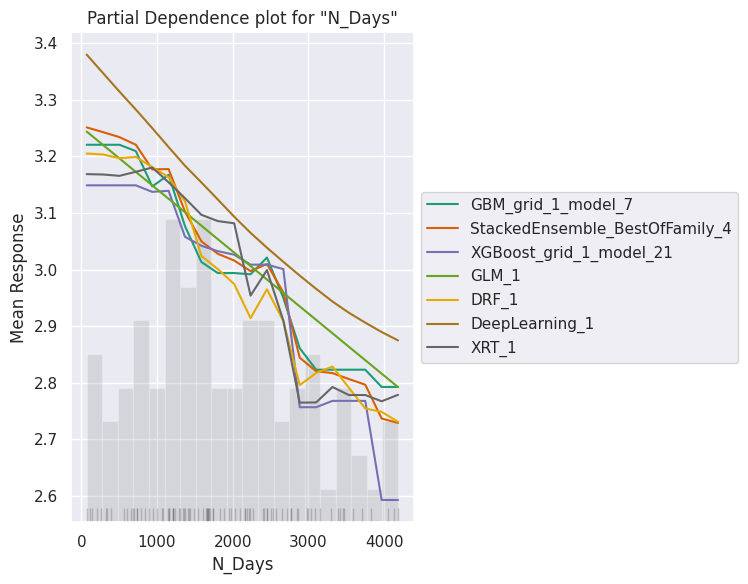

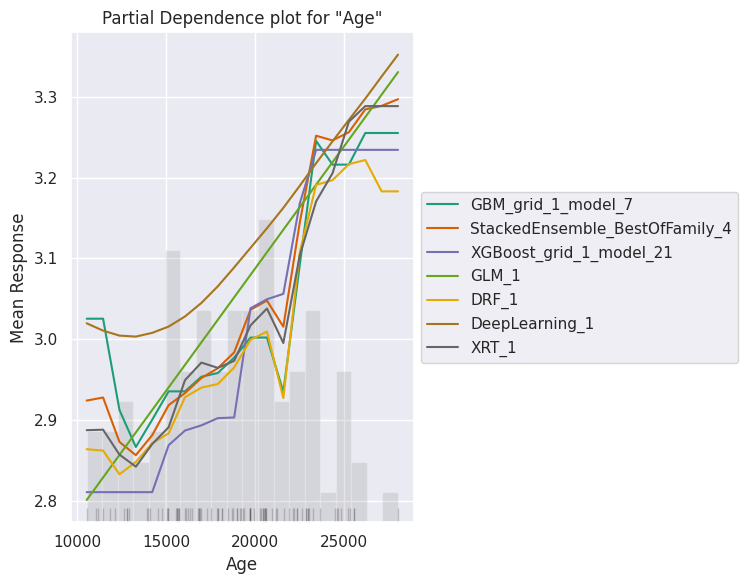

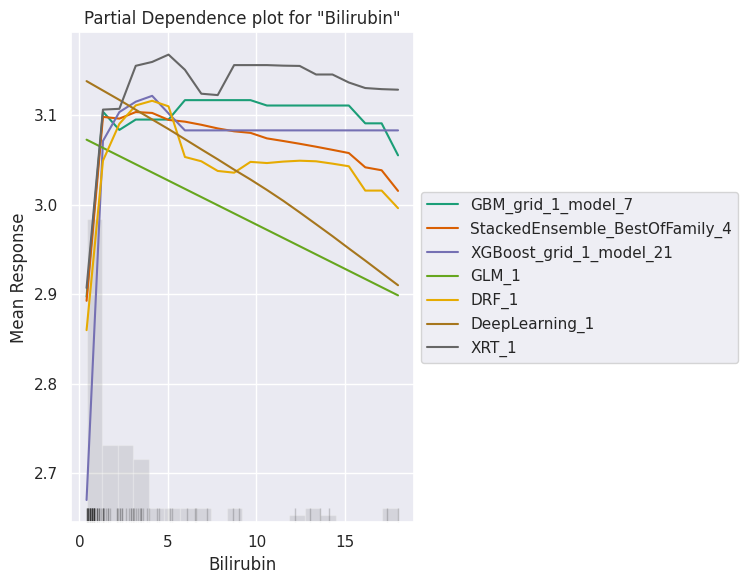

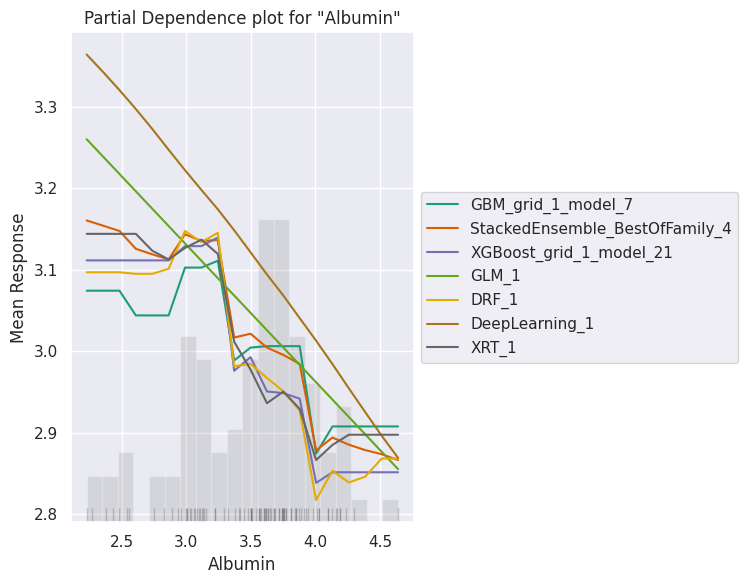

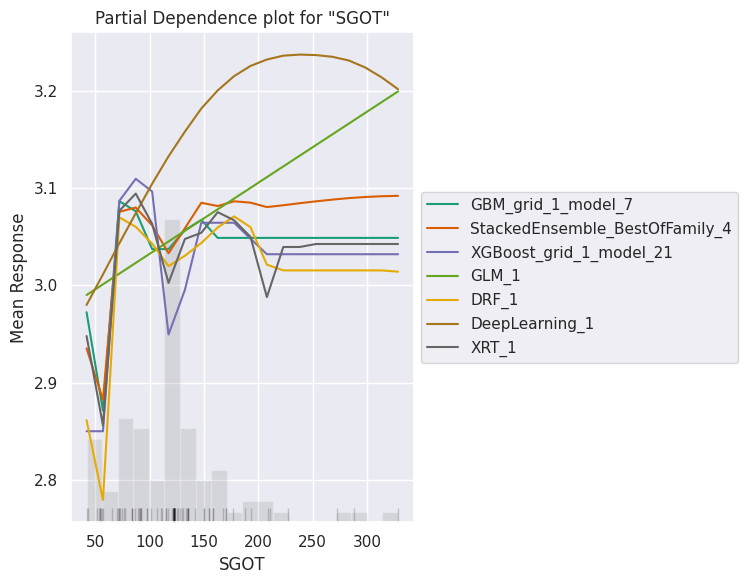

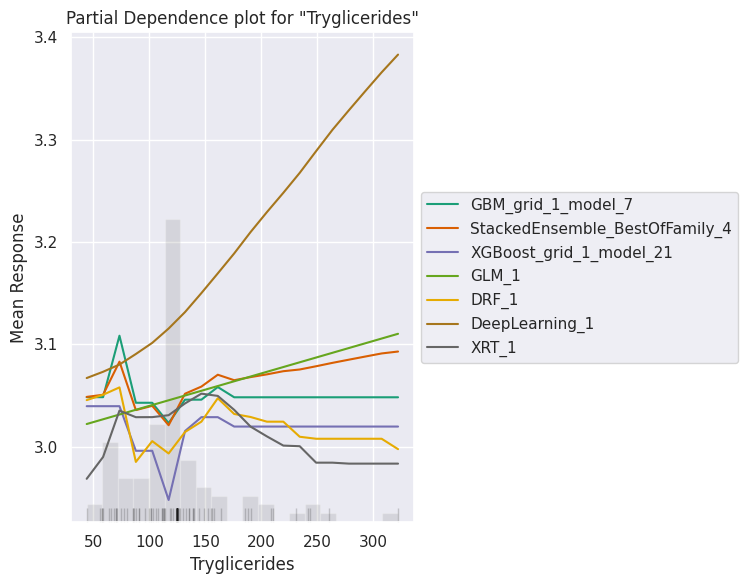

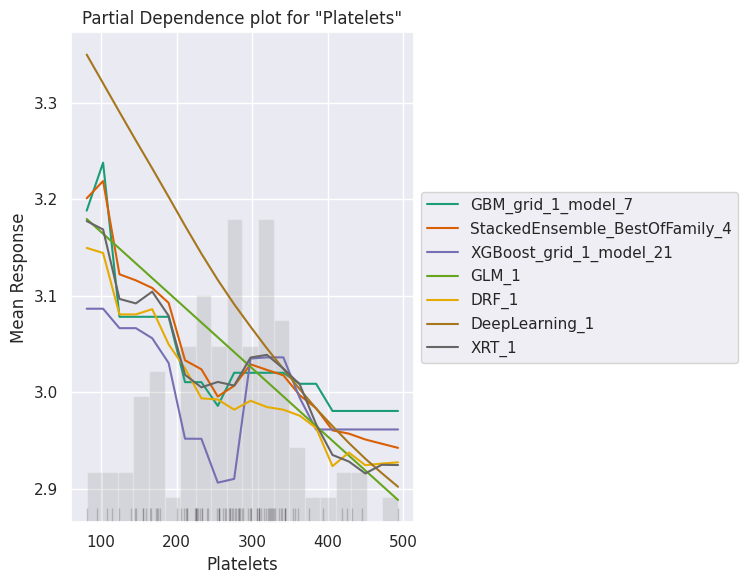

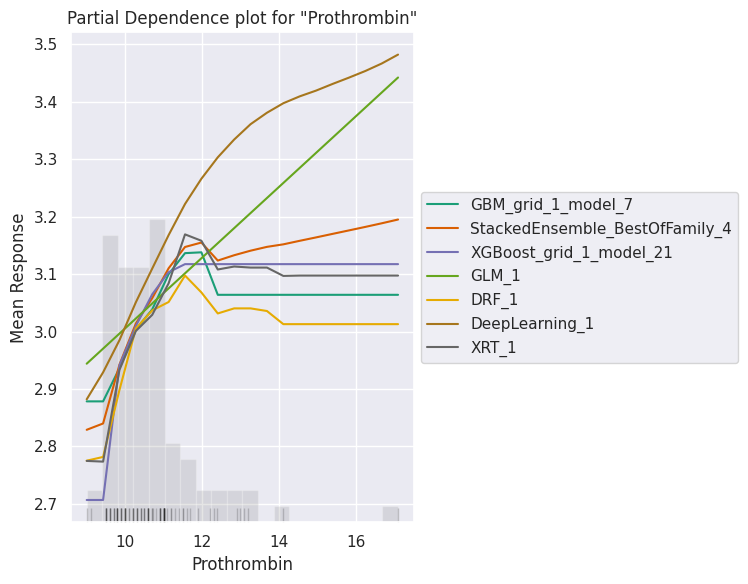

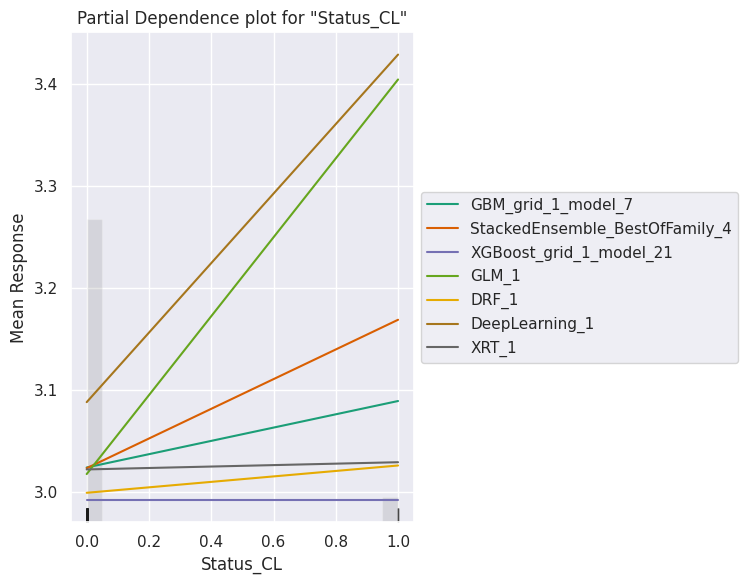

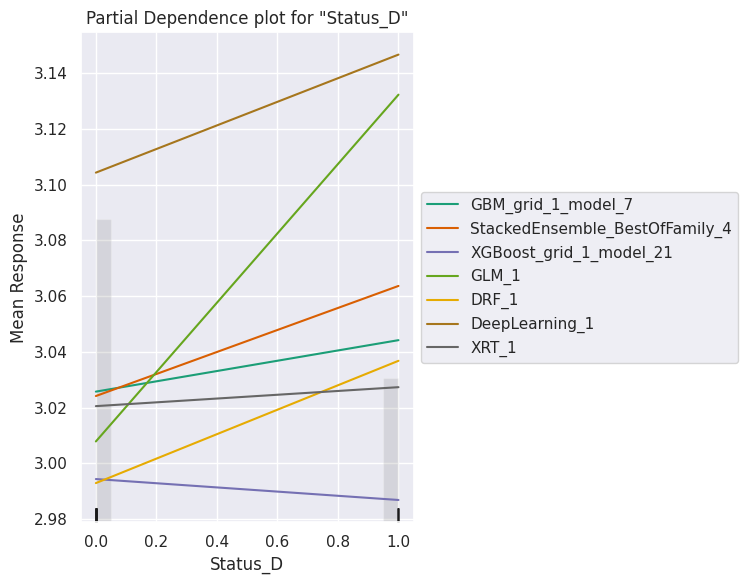

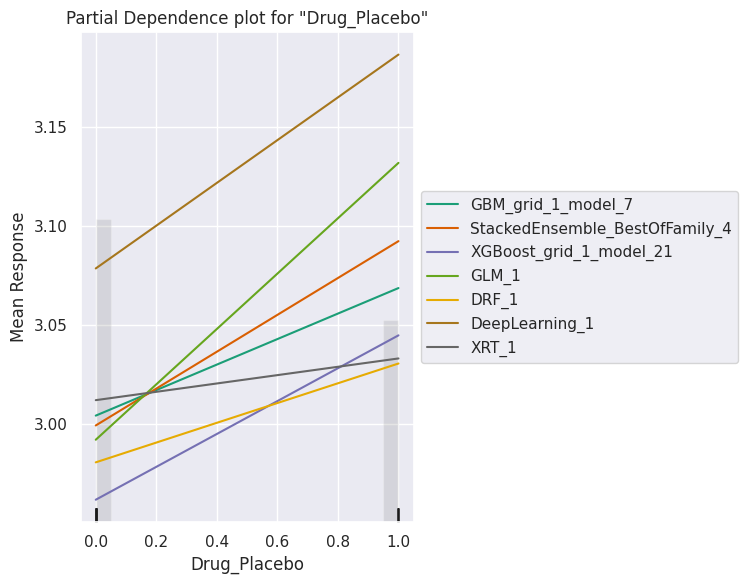

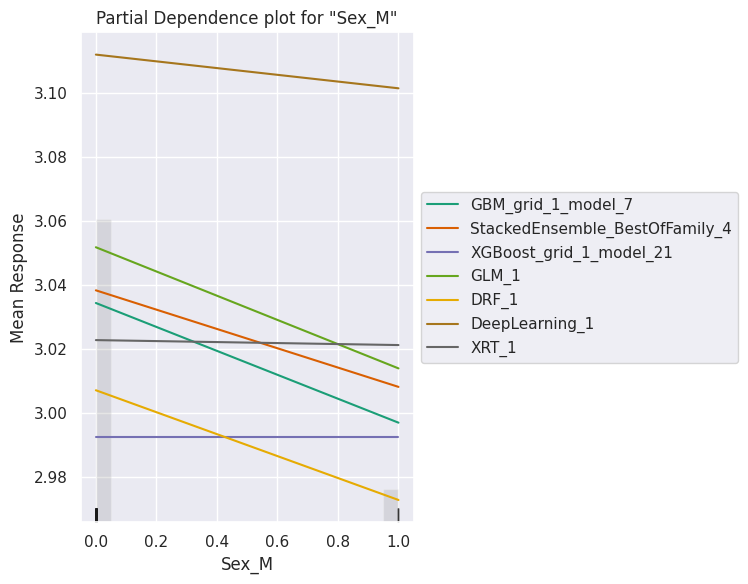

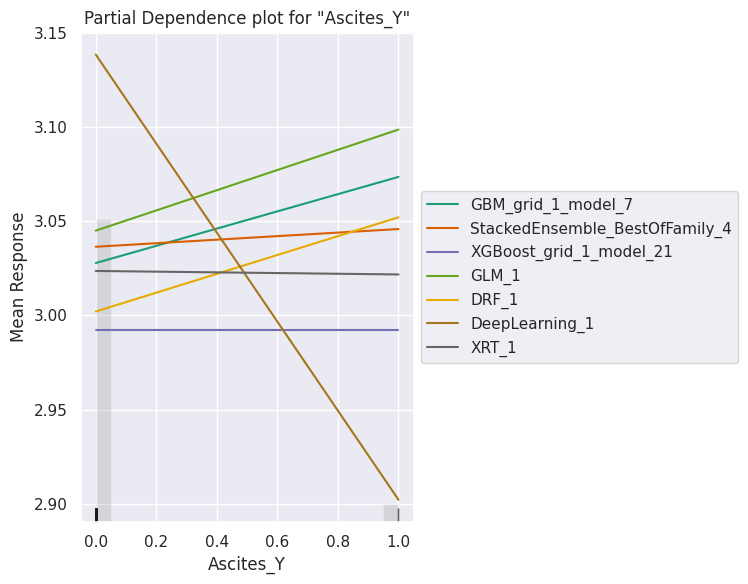

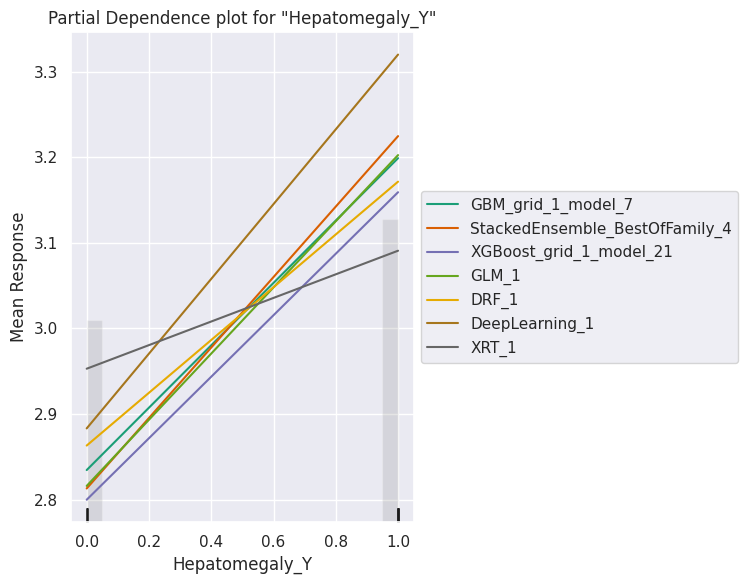

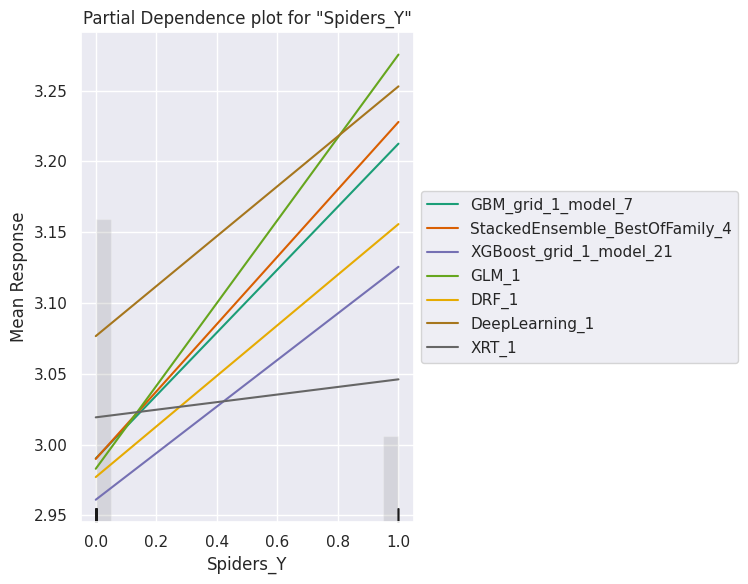

In [184]:
explain_model = aml.explain(frame = df1_test, figsize = (8,6),include_explanations=['pdp'])

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
XRT_1_AutoML_2_20240219_195319                           0.702053  0.492879  0.562492  0.207249                  0.492879                 386                   0.031113  DRF
GBM_grid_1_AutoML_2_20240219_195319_model_4              0.710148  0.50431   0.5735    0.208103                  0.50431                   65                   0.011609  GBM
GBM_grid_1_AutoML_2_20240219_195319_model_6              0.711001  0.505522  0.570751  0.211456                  0.505522                  40                   0.010257  GBM
GBM_1_AutoML_2_20240219_195319                           0.718465  0.516192  0.581868  0.213403                  0.516192                  84                   0.010515  GBM
GLM_1_AutoML_2_20240219_195319                           0.720815  0.519575  0.573987  0.211264                  0.519575                  14                   0.009197  GLM
GBM_grid_1_AutoML_2_20240219_195319_model_11             0.7226    0.522151  0.582283  0.210241                  0.522151                  53                   0.015036  GBM
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_195319  0.723883  0.524006  0.587337  0.211145                  0.524006                 133                   0.1867    StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240219_195319     0.724019  0.524204  0.587471  0.211171                  0.524204                 123                   0.150224  StackedEnsemble
GBM_grid_1_AutoML_2_20240219_195319_model_3              0.726689  0.528077  0.59299   0.210732                  0.528077                  55                   0.01436   GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_195319  0.728047  0.530052  0.579379  0.212417                  0.530052                 117                   0.040342  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_195319  0.728543  0.530775  0.591972  0.212273                  0.530775                 127                   0.079943  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240219_195319     0.730981  0.534333  0.593341  0.212763                  0.534333                 144                   0.617997  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20240219_195319     0.735641  0.541167  0.594512  0.214393                  0.541167                 298                   0.675876  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20240219_195319     0.735641  0.541167  0.594512  0.214393                  0.541167                 278                   1.59389   StackedEnsemble
XGBoost_grid_1_AutoML_2_20240219_195319_model_47         0.735899  0.541548  0.591363  0.2126                    0.541548                 254                   0.011528  XGBoost
DeepLearning_grid_3_AutoML_2_20240219_195319_model_1     0.738855  0.545906  0.581626  0.214462                  0.545906                1006                   0.05689   DeepLearning
StackedEnsemble_BestOfFamily_5_AutoML_2_20240219_195319  0.738933  0.546021  0.584985  0.21571                   0.546021                1029                   0.126216  StackedEnsemble
GBM_grid_1_AutoML_2_20240219_195319_model_9              0.740991  0.549068  0.590561  0.216706                  0.549068                  51                   0.014808  GBM
XGBoost_grid_1_AutoML_2_20240219_195319_model_28         0.742104  0.550718  0.612563  0.216658                  0.550718                 336                   0.01036   XGBoost
XGBoost_grid_1_AutoML_2_20240219_195319_model_19         0.743107  0.552208  0.602914  0.214468                  0.552208                 296                   0.135044  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

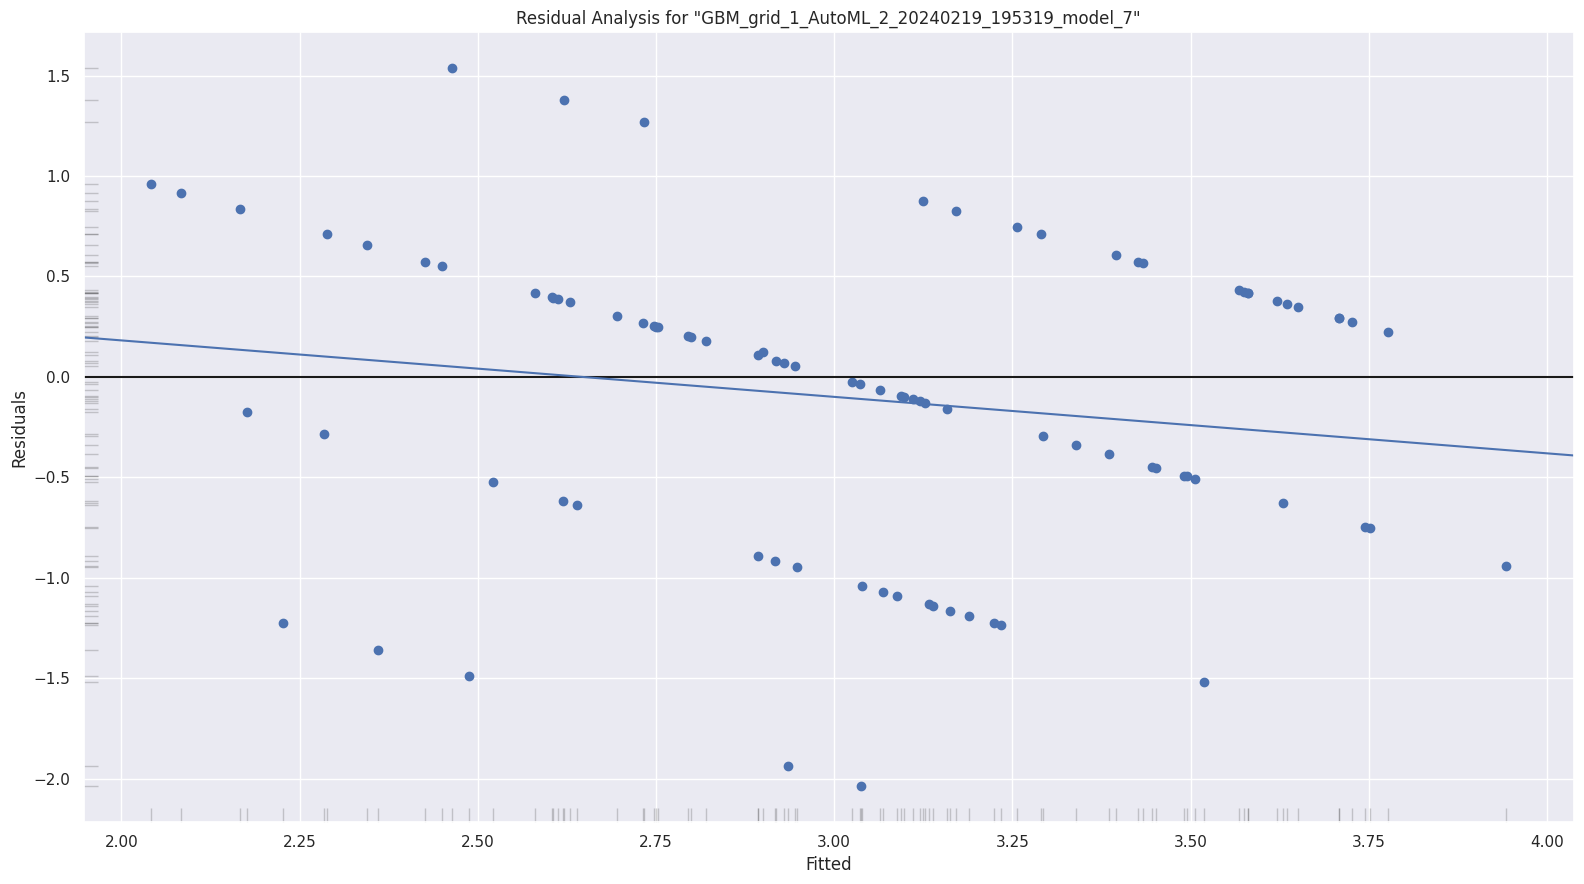

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

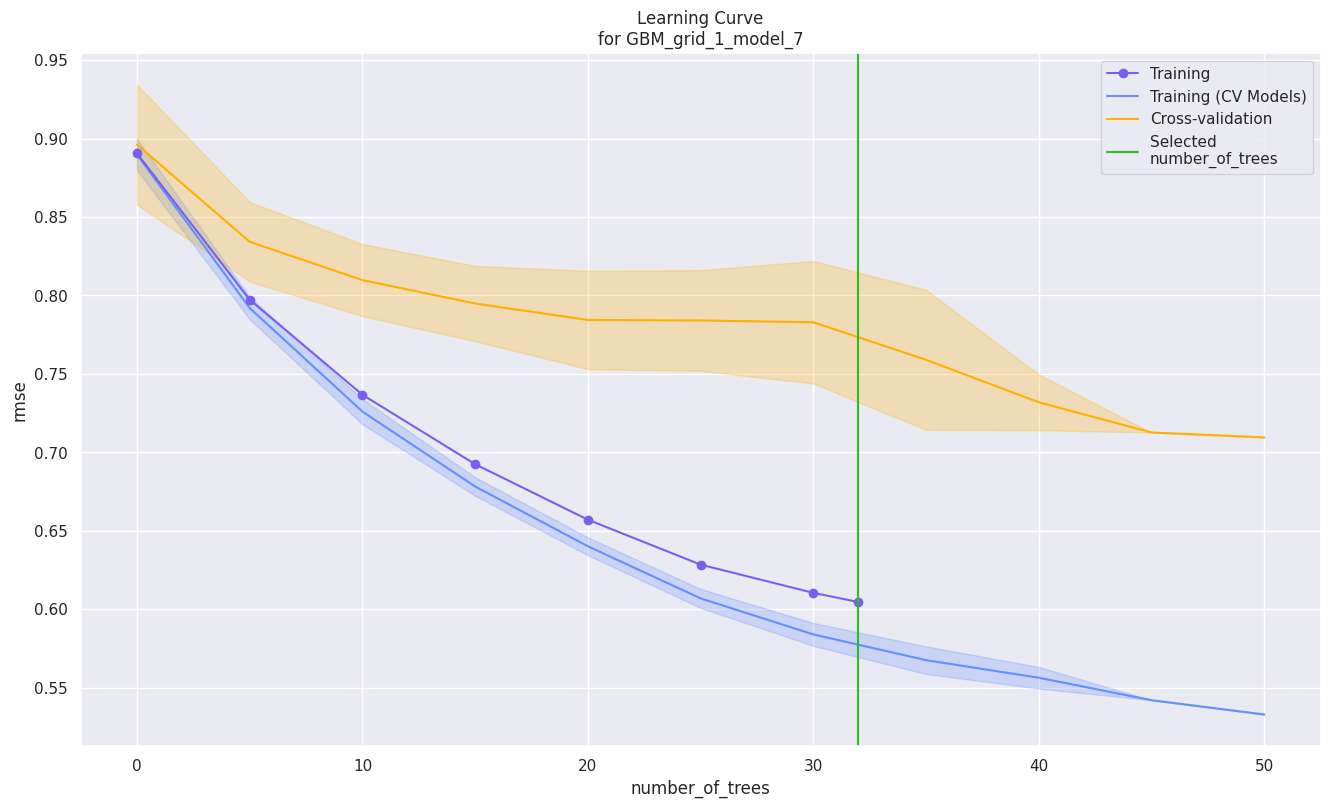

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

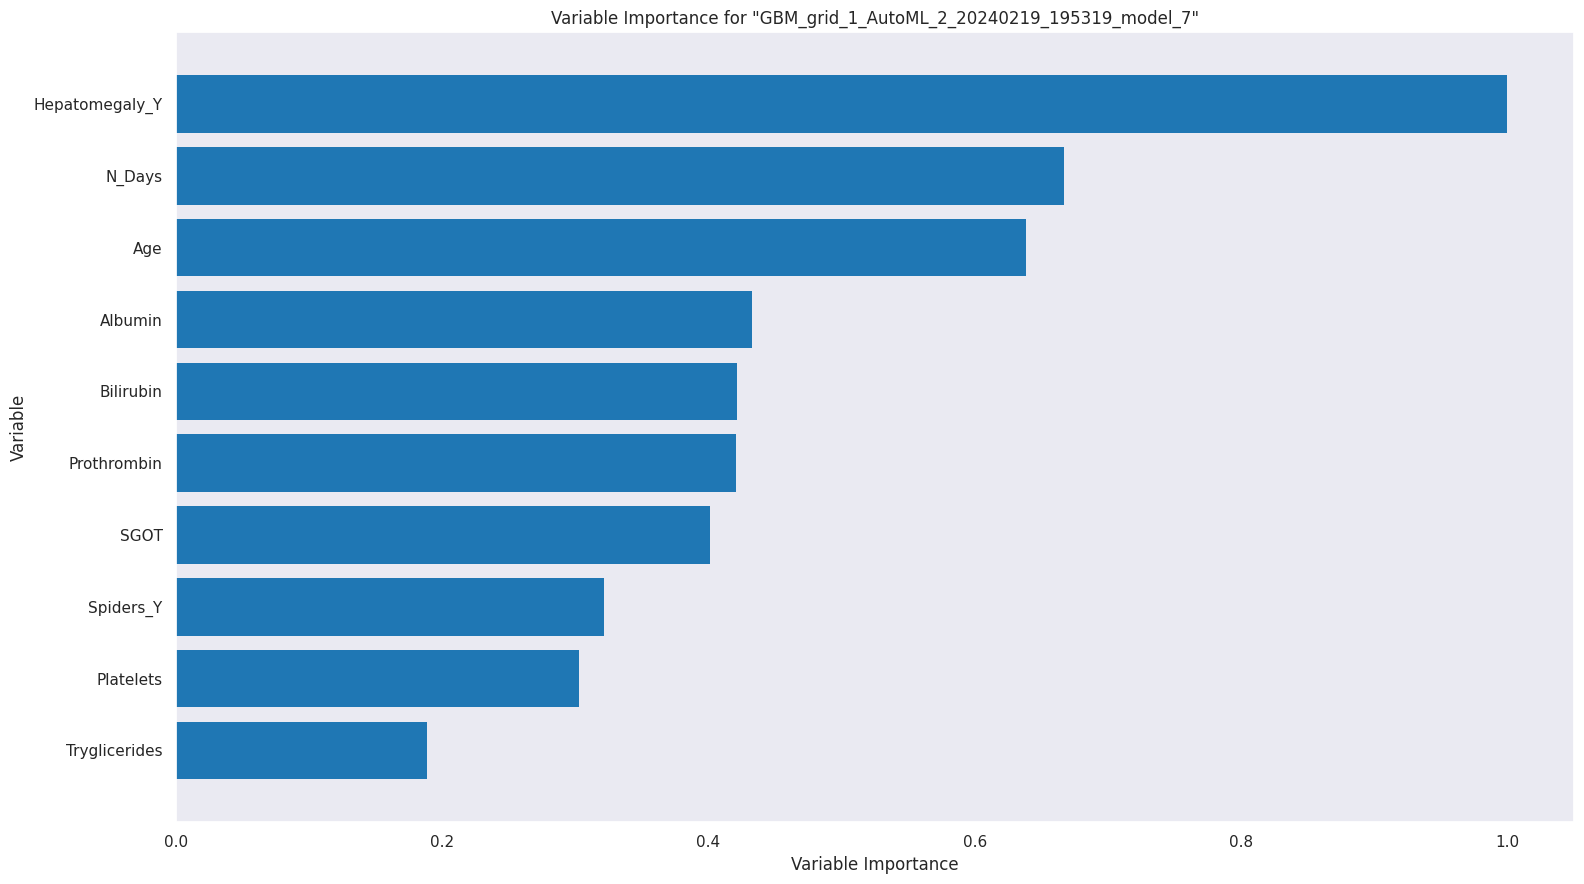

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

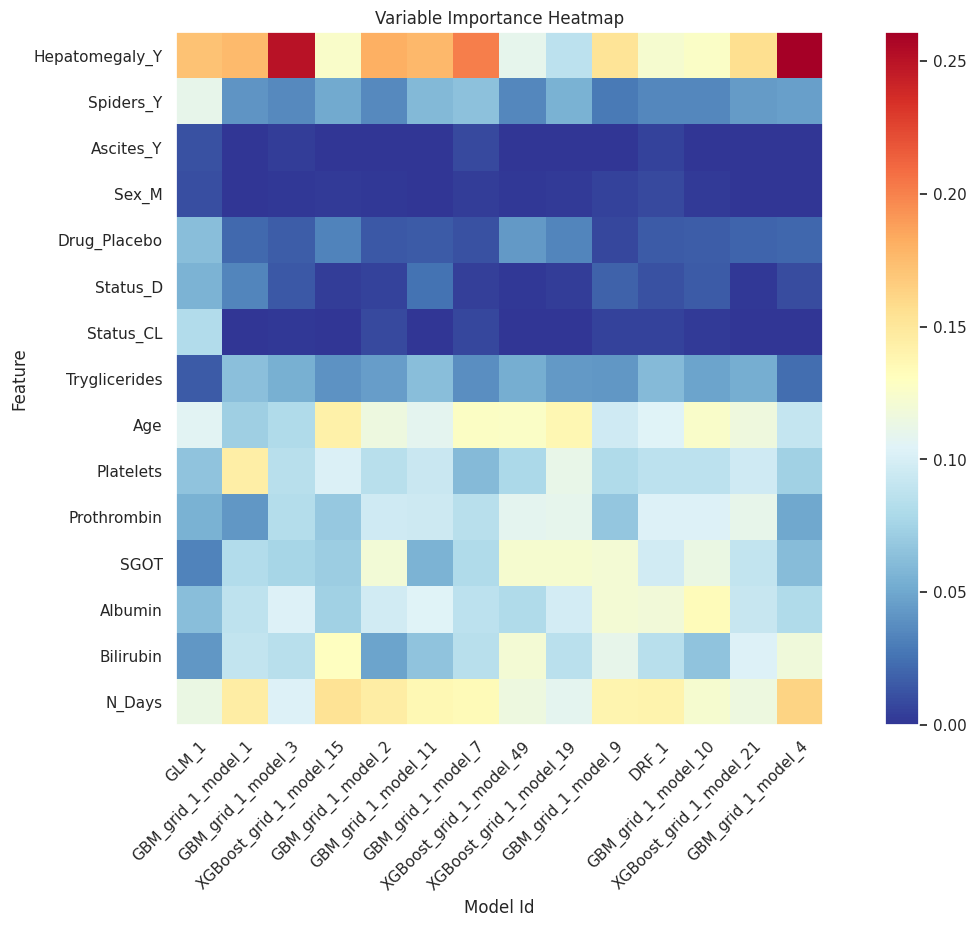

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

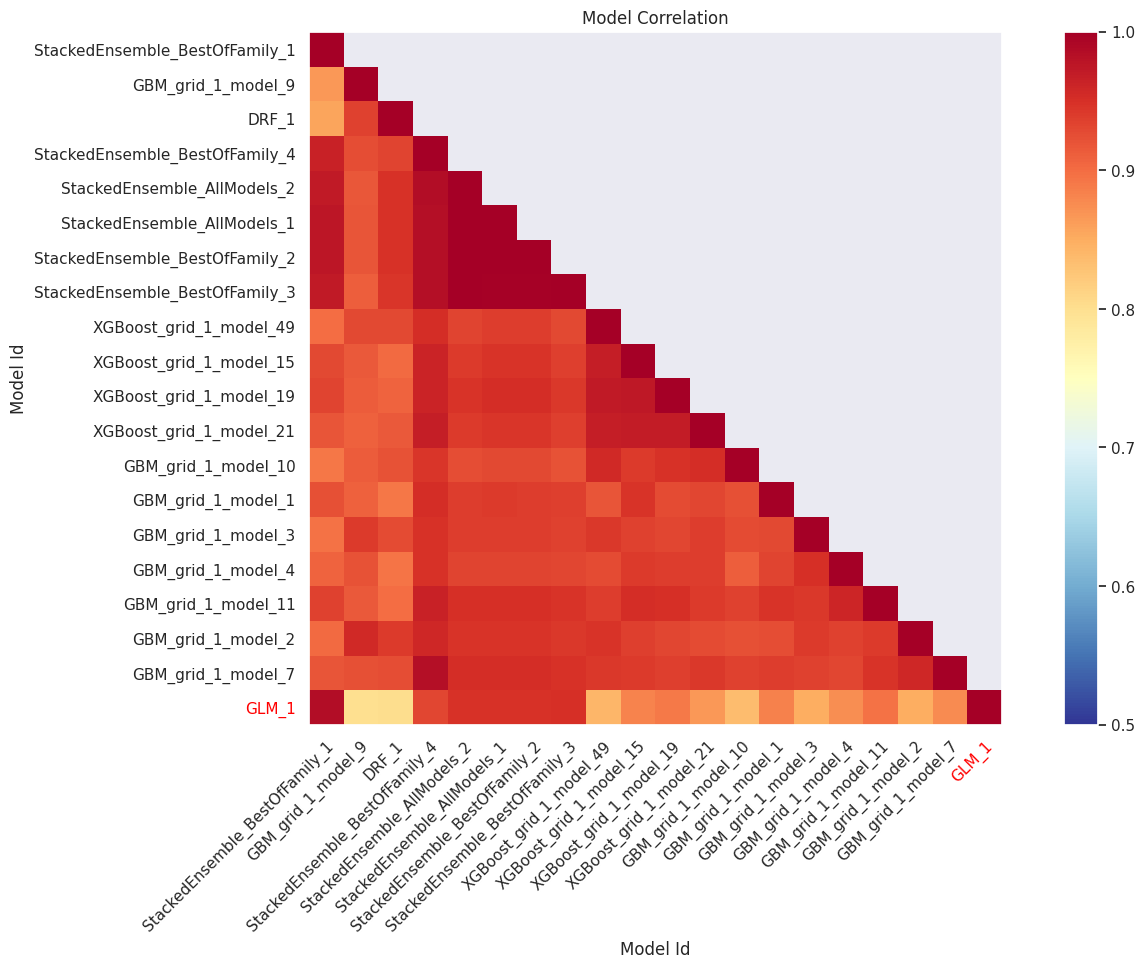

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

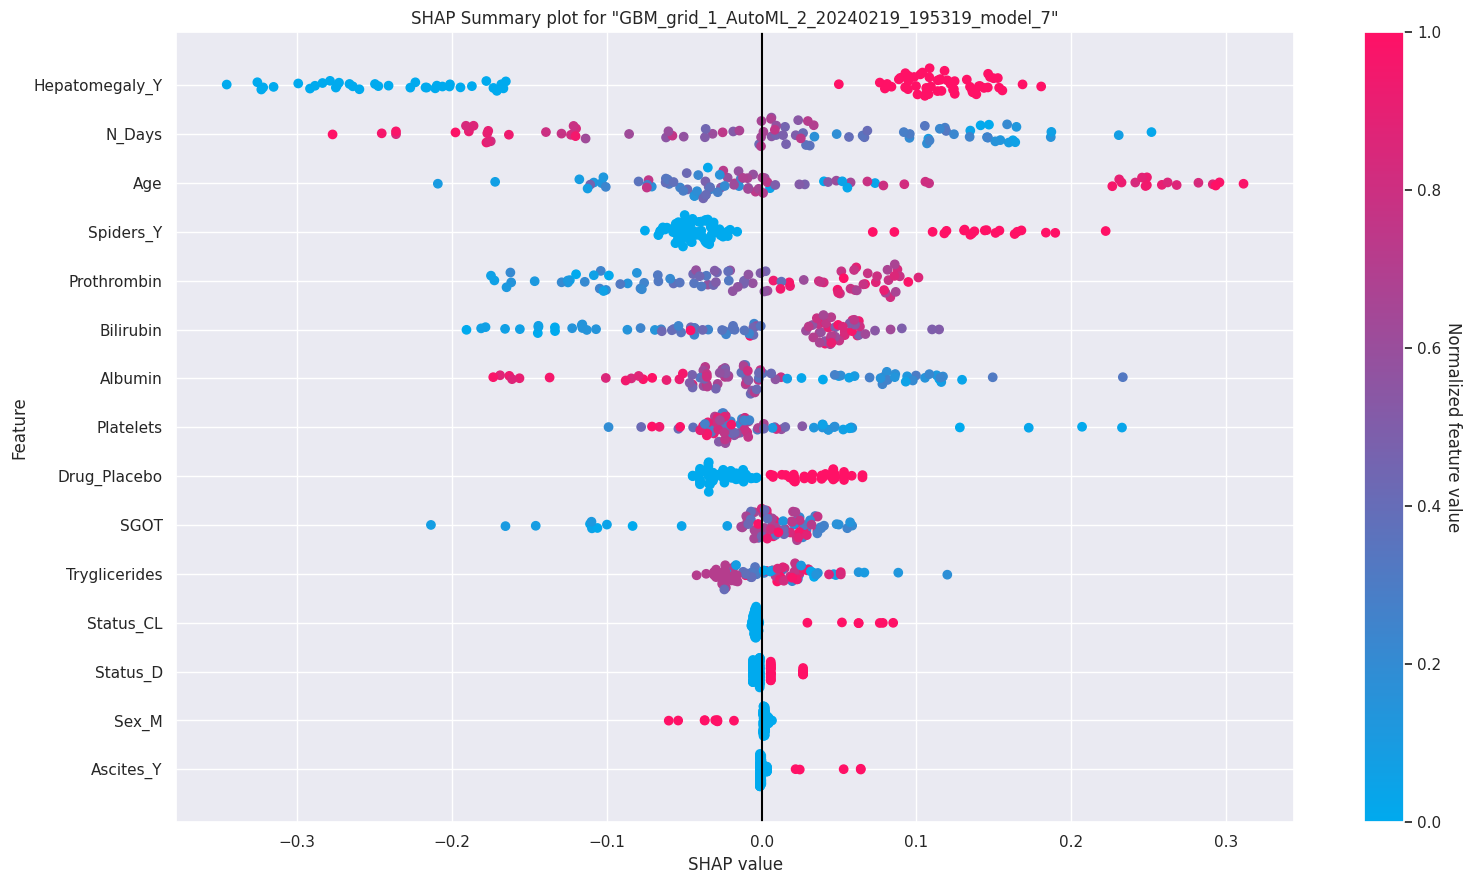

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

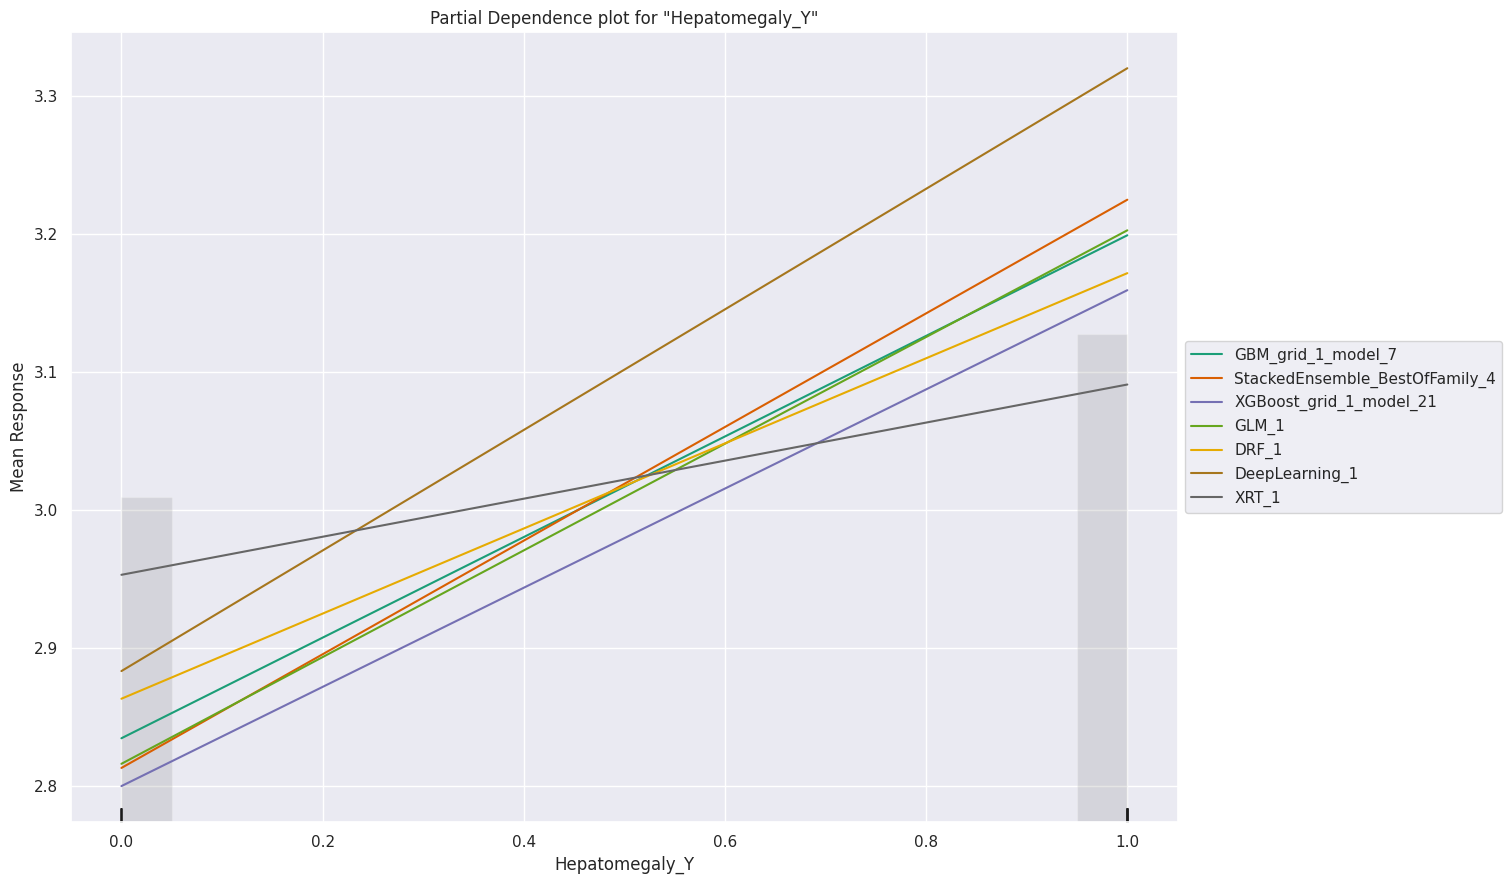

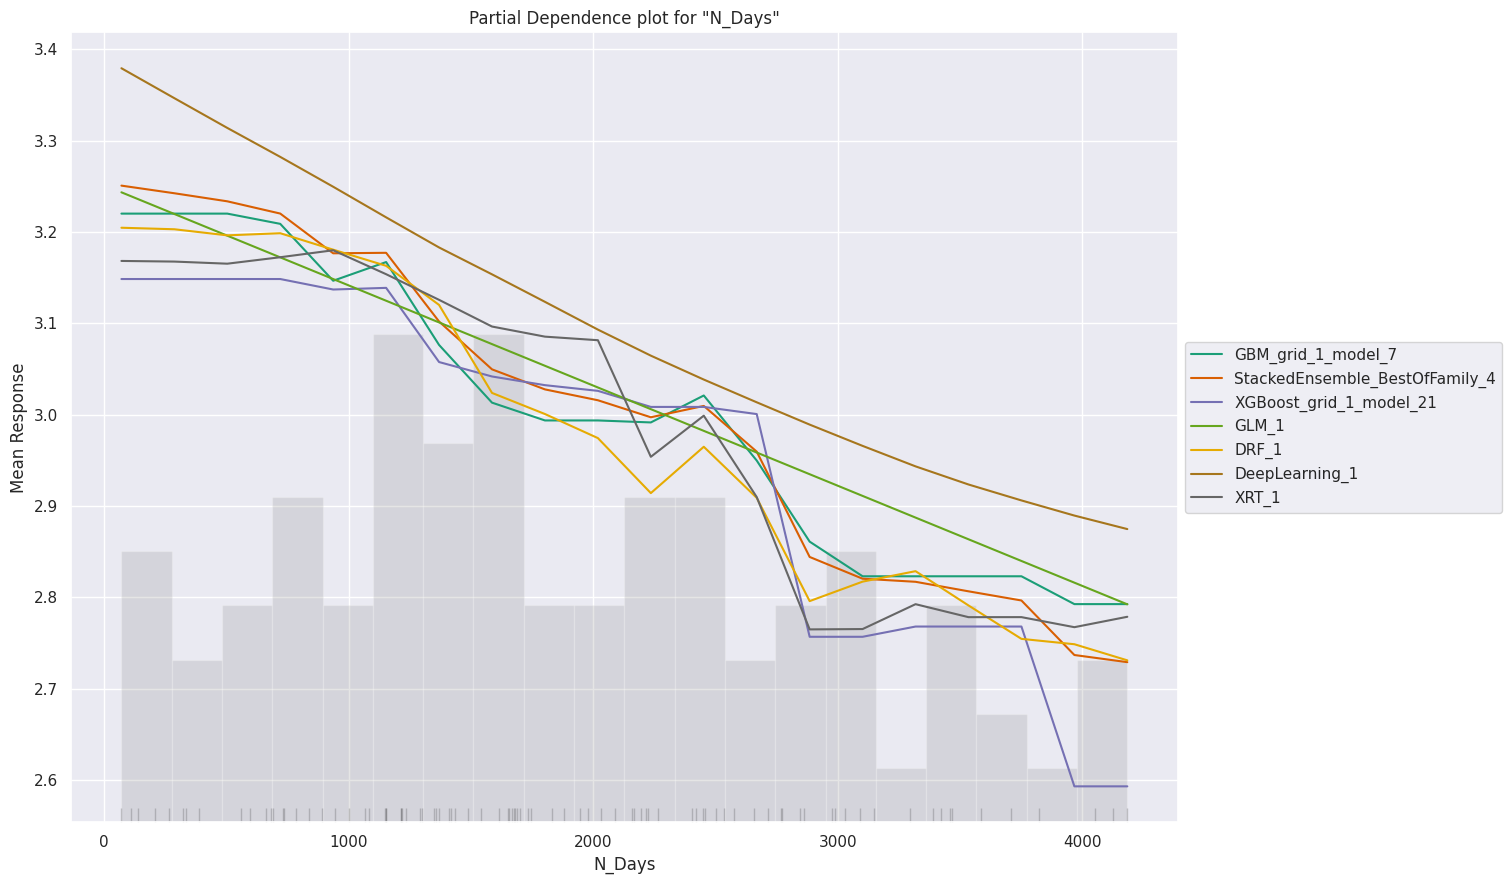

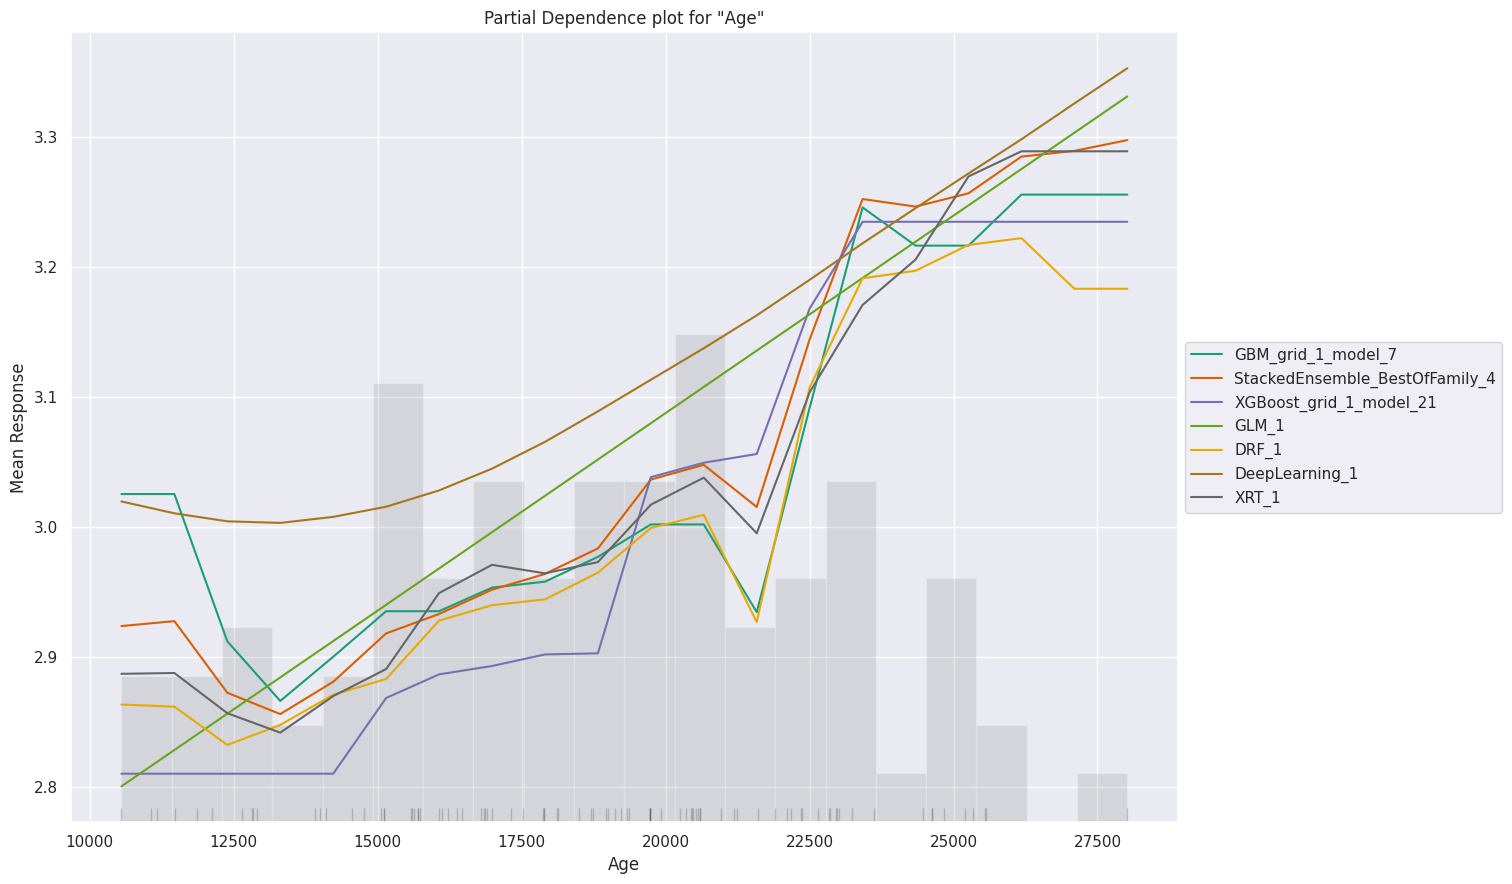

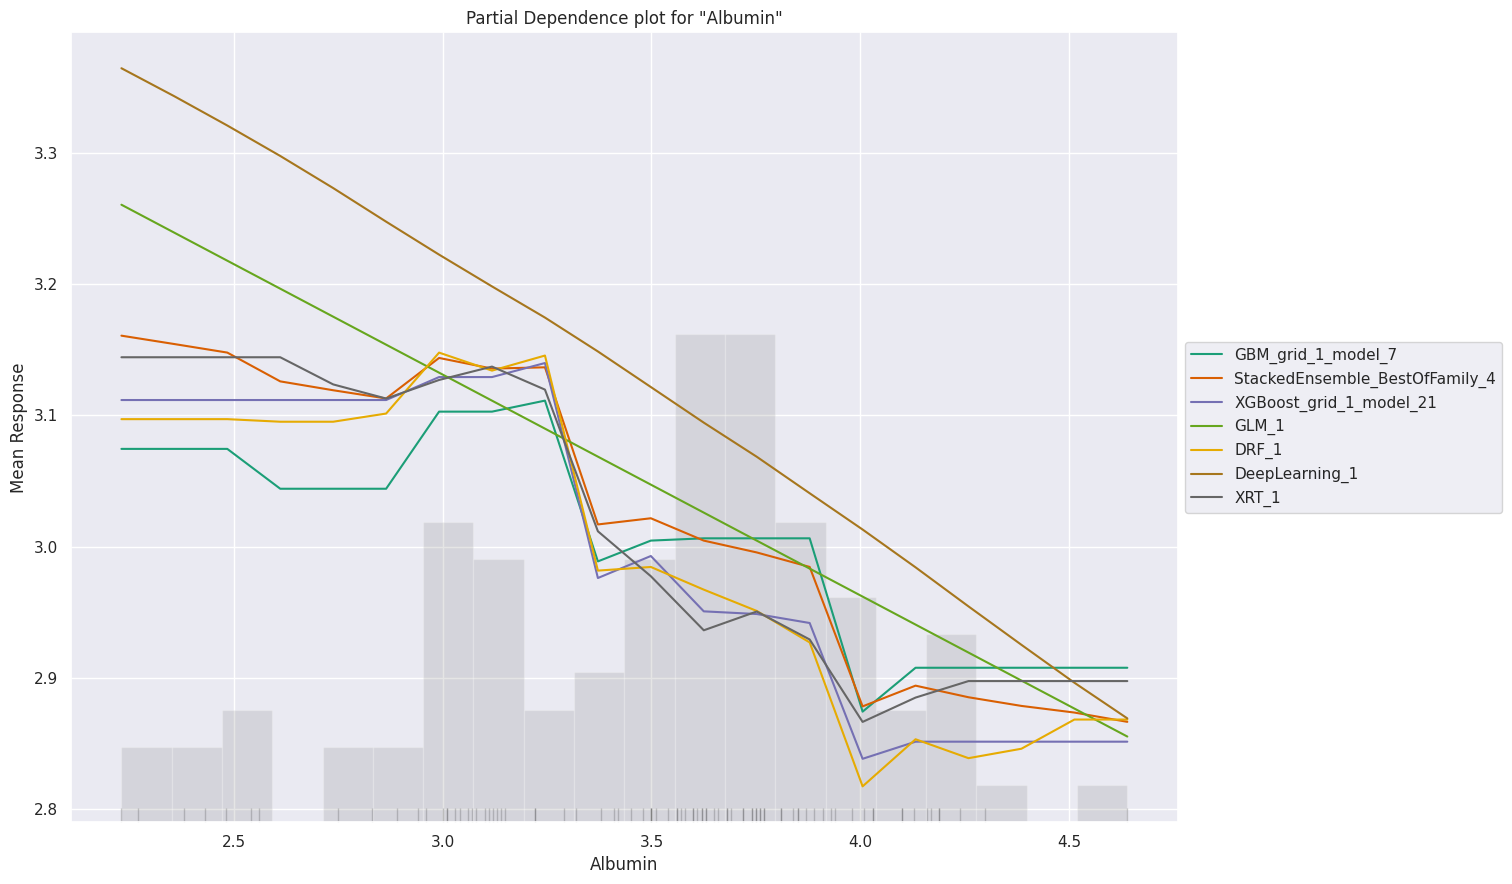

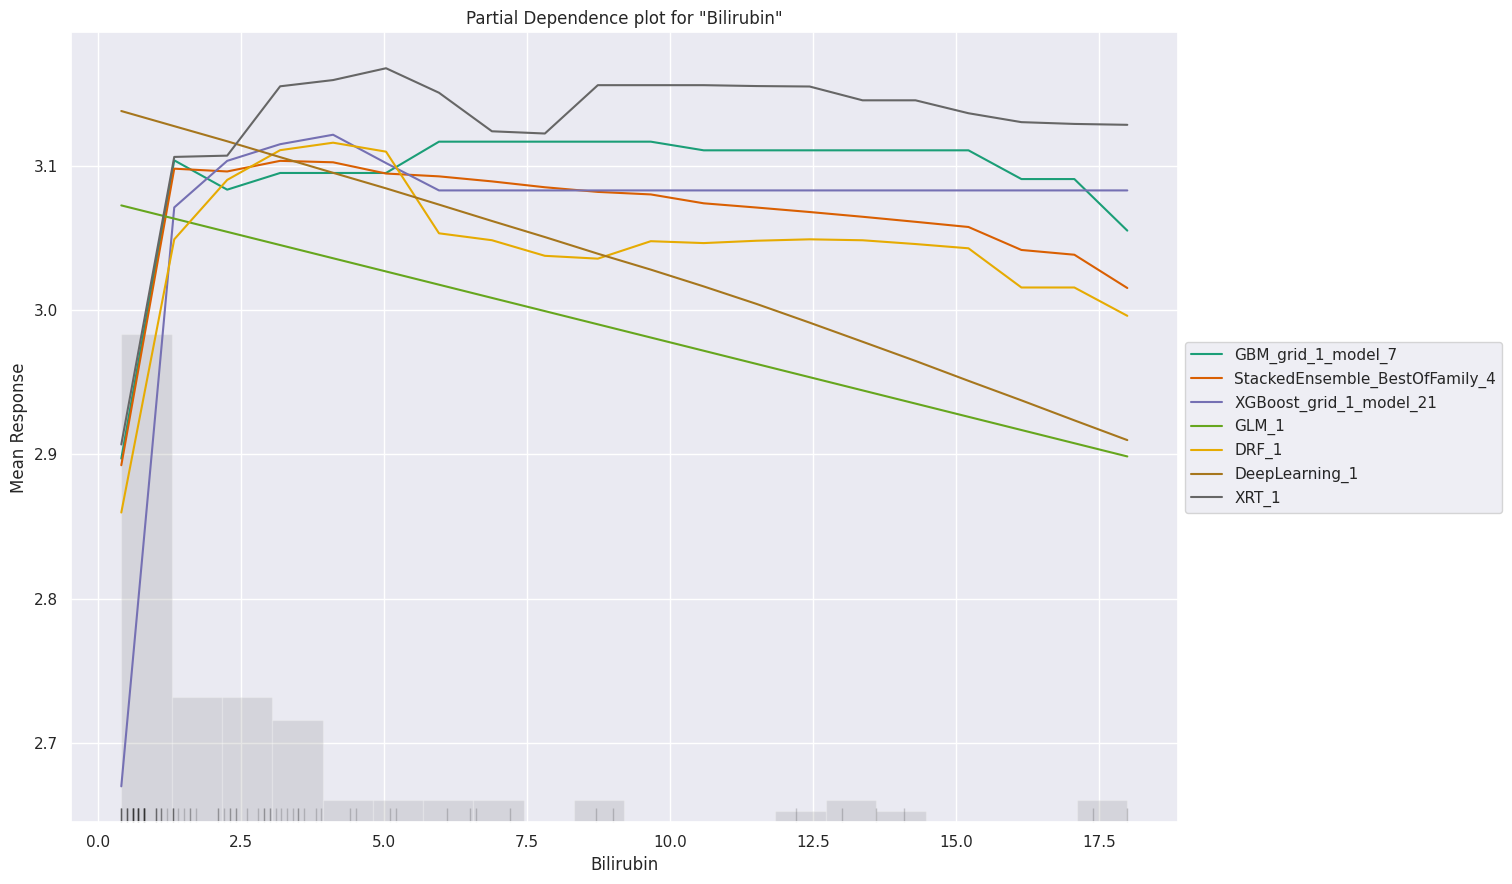

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

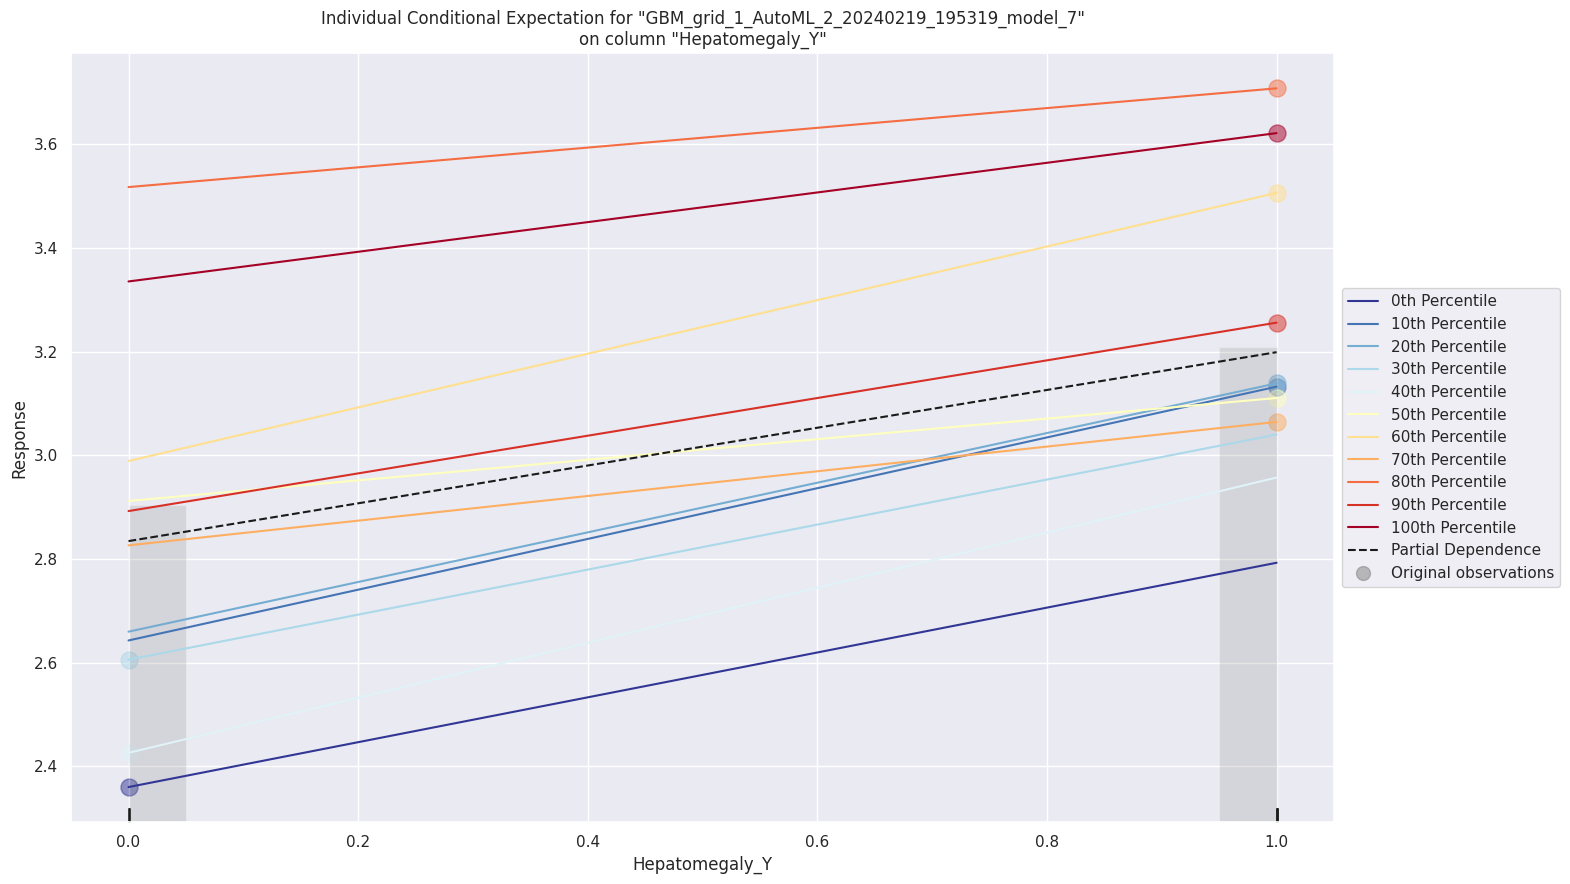

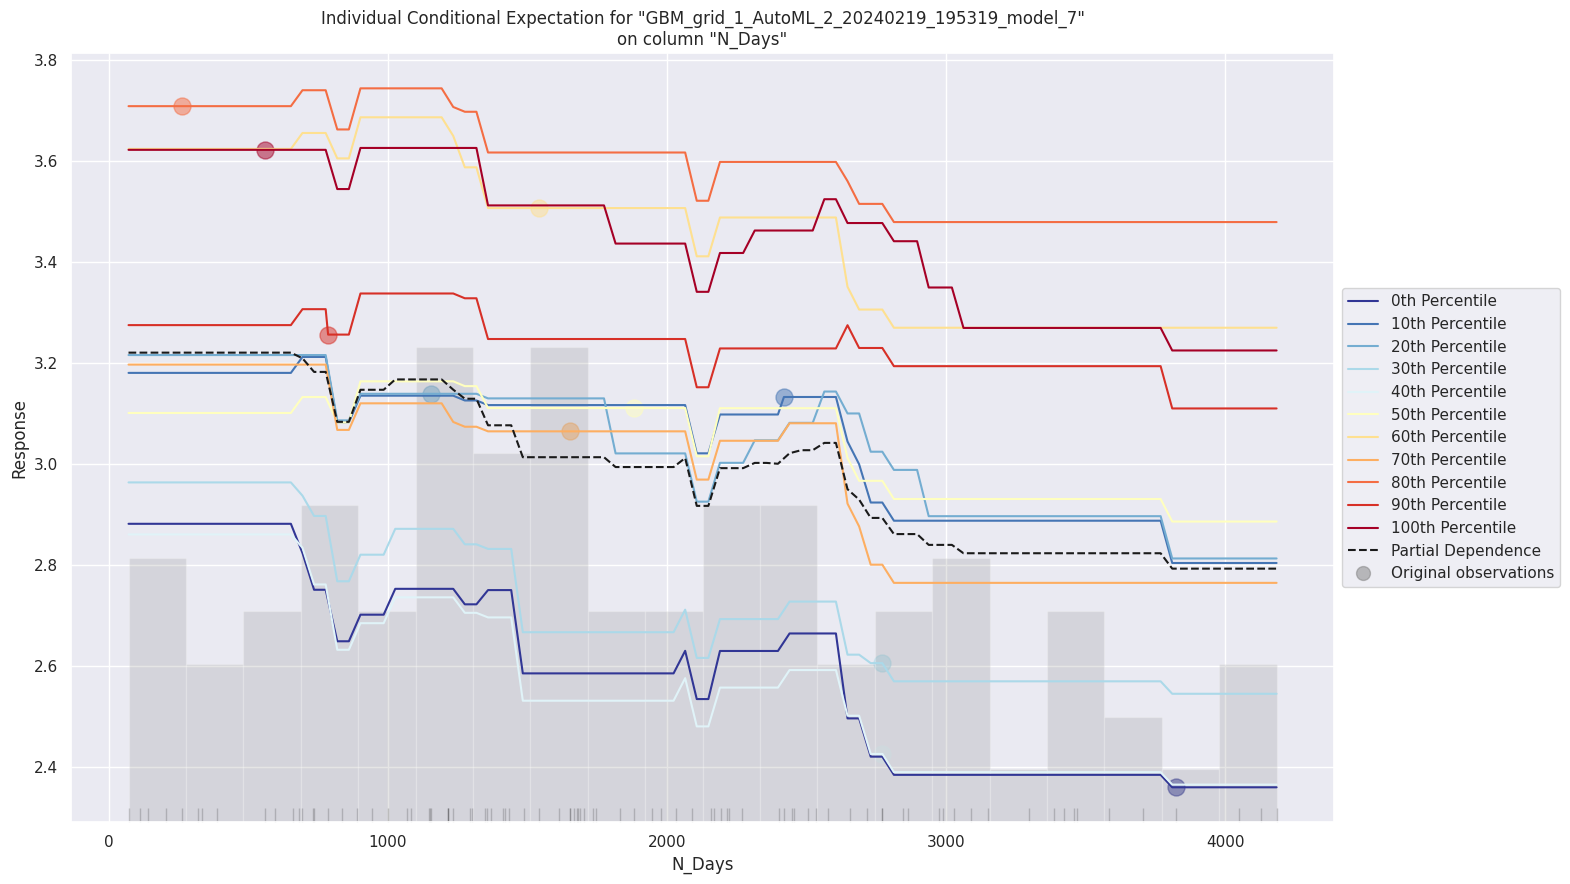

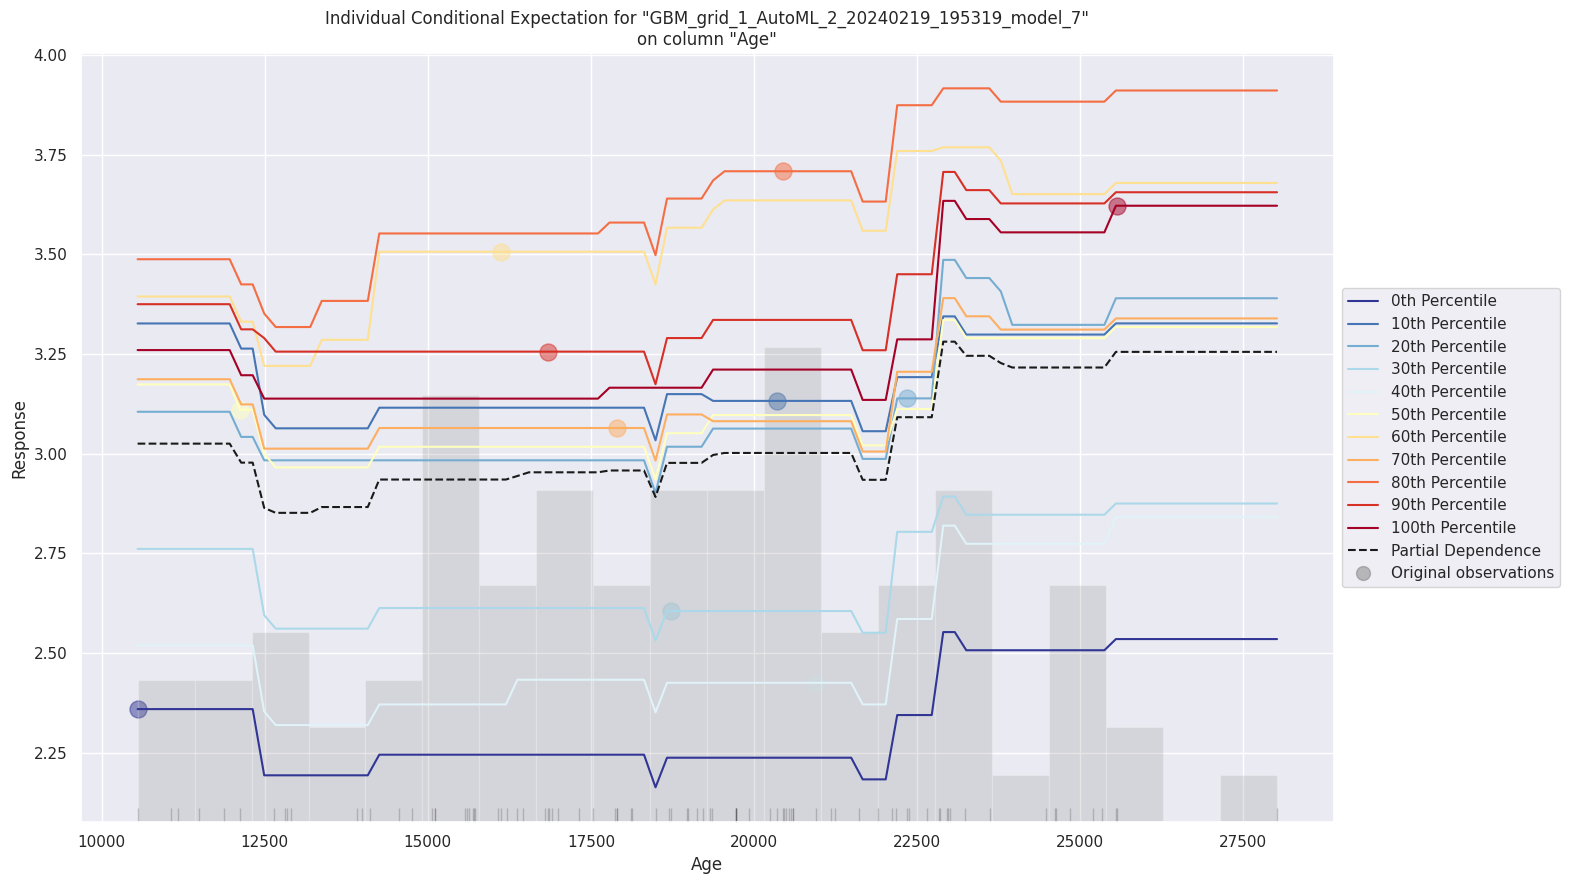

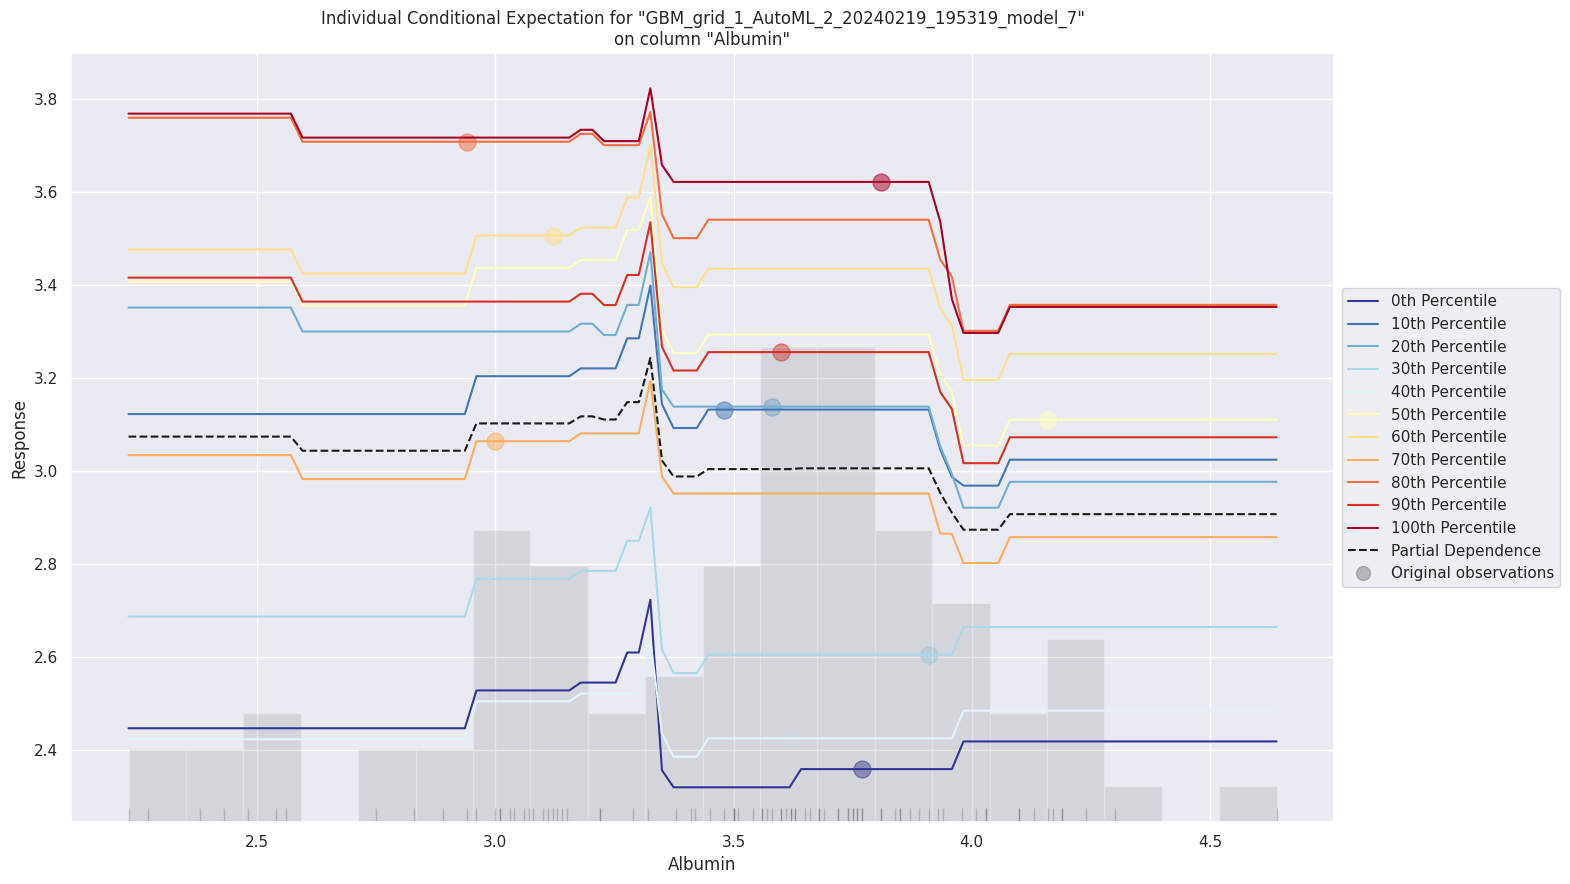

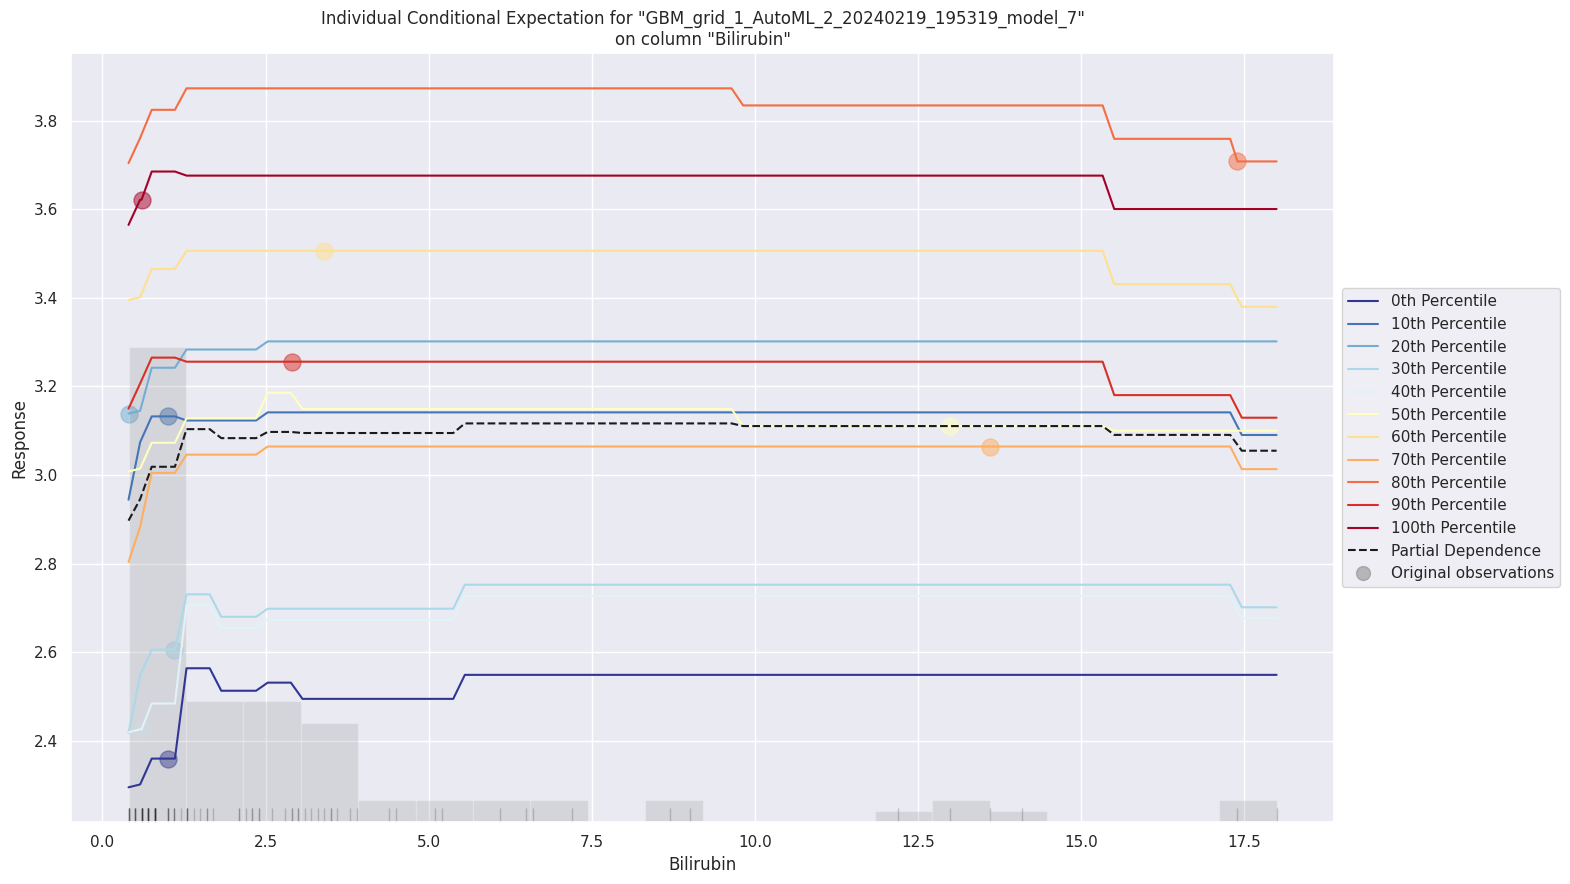

In [175]:
exa = aml.explain(df1_test)

# Interpreting Best Model from AutoML

# Residual Analysis:-

Striped Pattern of Residuals: The distinct horizontal lines or "stripes" of points suggest that the response variable is discrete or has been rounded to integer values. This pattern is common when predicting counts or categories that have been encoded as integers.

Distribution of Residuals: The residuals seem to be symmetrically distributed about the horizontal axis, which suggests that the model does not exhibit systematic overprediction or underprediction across the range of fitted values.

Constant Variance (Homoscedasticity): There does not appear to be a clear pattern of increasing or decreasing spread in the residuals as the fitted values increase. This suggests that the variance of the residuals is constant (homoscedasticity), which is a desirable property in a regression model.

No Outliers: The plot does not show any individual points that deviate significantly from the rest, which would indicate outliers. This can be seen as a positive sign that the model is robust to unusual data points.

Potential for Improvement: The absence of a clear, funnel-like widening or narrowing pattern in the residuals is good. However, the discrete horizontal lines of residuals might indicate that a different model or transformation could better capture the discrete nature of the response variable.

Need for Model Assessment: While the residual plot provides insights into certain aspects of model performance, it is essential to assess the model further using additional diagnostics and validation techniques, such as cross-validation and analysis of other residual-based diagnostics.

# SHAP Summary:-

Feature Importance: The features are arranged in descending order of importance from top to bottom. 'Hepatomegaly_Y' is the most influential feature, followed by 'N_Days', 'Age', and so on. 'Ascites_Y' appears to have the least impact on the model's predictions.

Impact on Prediction: The SHAP value (horizontal axis) indicates the magnitude and direction of a feature's impact on the model's prediction. Features that push the prediction higher are shown with positive SHAP values, while features that push the prediction lower are shown with negative SHAP values.

Feature Value Impact: The color represents the feature value (normalized), with red indicating higher feature values and blue indicating lower feature values. For instance, high values of 'Hepatomegaly_Y' seem to push the prediction higher (towards the right), indicating a positive impact on the predicted outcome when 'Hepatomegaly_Y' is present.

Distribution of Impact: The spread of the dots along the SHAP value axis for each feature shows the variety of impacts that different values of the feature have on the prediction. For example, 'Hepatomegaly_Y' has a consistent positive impact on the predictions across its values, as indicated by the cluster of points on the positive side of the SHAP value axis.

Comparative Feature Influence: By comparing the spread of SHAP values across features, we can see which features have a more consistent impact on predictions. 'N_Days' and 'Age' seem to have a wide spread of SHAP values, indicating varying impacts depending on the specific values they take.

Insight into Model Behavior: SHAP plots offer a more nuanced view of model behavior compared to traditional feature importance charts. They not only show which features are important but also how the values of these features affect the predictions.

In conclusion, the SHAP summary plot for this model indicates that 'Hepatomegaly_Y', 'N_Days', and 'Age' are significant predictors with varying degrees of impact on the model's predictions. The model's behavior suggests that certain conditions and patient characteristics play a critical role in determining the predicted outcome. The use of SHAP values allows for a more detailed interpretation of the model's decision-making process than traditional methods.

# Partial Dependence Plot (PDP):-
Hepatomegaly_Y
The PDP for 'Hepatomegaly_Y' shows a positive relationship with the target variable. As 'Hepatomegaly_Y' increases, the mean response consistently increases across all models. This suggests that the presence of hepatomegaly is associated with higher values of the response variable.

N_Days
The PDP for 'N_Days' indicates a generally negative relationship with the target variable. For most models, as 'N_Days' increases, the mean response decreases. This trend is quite consistent across different models, indicating that longer durations (more days) are associated with lower values of the response variable.

Age
For 'Age,' the PDP exhibits a complex, non-linear relationship with the target variable. Initially, the mean response slightly decreases with age, then increases sharply after a certain point, and finally levels off. This suggests that age has a varied effect on the response variable, with different age ranges having different impacts.

Albumin
The PDP for 'Albumin' indicates that higher albumin levels initially correspond to higher mean response values, but after a peak, the mean response sharply decreases as albumin levels continue to rise. This suggests a non-linear relationship where both very low and very high levels of albumin are associated with lower values of the response variable.

Bilirubin
The PDP for 'Bilirubin' shows a decreasing trend, where an increase in bilirubin levels leads to a decrease in the mean response. This trend suggests that higher bilirubin levels are detrimental to the response variable's outcome.

Platelets: The plot indicates an inverse relationship between Platelets and the predicted response, with most models showing a decreasing trend. This could imply that higher platelet counts are associated with lower model predictions.

Prothrombin: The PDP for Prothrombin exhibits varying behavior across different models. Some show a positive correlation, while others indicate no clear trend. This variability suggests model-specific interpretations for the feature's impact.

Status_CL and Status_D: Both features exhibit a positive trend in the PDP, indicating that as the status changes from 0 to 1, there's an associated increase in the prediction. The degree of change varies across models, reflecting their different handling of these categorical variables.

Drug_Placebo: The presence of a placebo (Drug_Placebo = 1) seems to have a positive effect on the model's prediction. The slope of the PDP suggests that this feature has a varying influence on the outcome across different models.

Sex_M: The PDP shows a general downward trend, suggesting that the 'M' category in the Sex feature may lead to lower predictions by the model.

Ascites_Y: The PDP indicates an upward trend for the Ascites_Y feature, suggesting that the presence of ascites (Ascites_Y = 1) is associated with higher predictions in the model.

Spiders_Y: The PDP for Spiders_Y shows a positive correlation with the predicted response, where higher values correspond to higher predictions.

From these PDPs, we can draw the following conclusions:

'Hepatomegaly_Y' has a positive influence on the response variable across all models.
'N_Days' tends to have a negative influence, suggesting that as the number of days increases, the response variable tends to decrease.
'Age' shows a complex relationship, indicating that middle age ranges may have a positive influence, while very young or very old ages do not influence as much.
'Albumin' and 'Bilirubin' both show non-linear relationships with the response variable, with optimal ranges that maximize the mean response, beyond which the response decreases.

In [185]:
import statsmodels.formula.api as smf  # OLS model Library

In [187]:
import h2o
pandas_df = h2o.as_list(df1)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Model Coefficients:

Coefficients in the model are indicative of the relationship between each independent variable and the dependent variable.
Positive coefficients (e.g., Prothrombin, Hepatomegaly_Y, Spiders_Y) suggest that as the predictor variable increases, the expected value of the dependent variable also increases.
Negative coefficients (e.g., N_Days, Bilirubin) suggest an inverse relationship where an increase in the predictor variable is associated with a decrease in the dependent variable.
The magnitude of these coefficients indicates the strength of the relationship. Larger absolute values suggest a stronger relationship.

P-Values:

P-values assess the significance of the coefficients.
N_Days, Age, Bilirubin, SGOT, Platelets, Prothrombin, Status_CL, Drug_Placebo, Hepatomegaly_Y, and Spiders_Y have p-values less than 0.05, indicating that they are statistically significant and have a non-random association with the dependent variable.
Other variables with p-values higher than 0.05 are not statistically significant at the conventional alpha level of 0.05, suggesting their relationship with the dependent variable could be due to random chance.

R-squared:

An R-squared (uncentered) of 0.945 suggests that 94.5% of the variability in the dependent variable is explained by the model. This is typically a high value, but since it is uncentered, caution should be taken in its interpretation, especially if the model does not include an intercept.

F-statistic:

An F-statistic of 457.7 with a very small p-value indicates that the model is statistically significant overall, meaning that it provides a better fit to the data than a model with no predictors.

Durbin-Watson:

A Durbin-Watson statistic of 1.889 suggests that there is no significant autocorrelation in the residuals of the model. It is close to the value of 2, which indicates no autocorrelation.

Jarque-Bera (JB):

A JB value of 11.748 with a p-value of 0.00281 suggests that the residuals of the model do not follow a normal distribution, which is an assumption of OLS regression.
Condition Number:

A condition number of 9.49e+04 indicates potential issues with multicollinearity. This can affect the stability of the coefficient estimates and should be investigated.
Overall, the model appears to have a good fit with some predictors showing strong and significant relationships with the dependent variable. However, the potential multicollinearity and non-normality of residuals are concerns that should be addressed, perhaps by checking VIF scores for multicollinearity and transforming variables or using robust regression techniques to handle non-normality.






Hyperparameter Tuning - Random Grid Search on GBM Model

In [209]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [210]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [211]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [212]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [221]:



# Assuming 'X' is an H2OFrame and you want to use all columns as predictors except the target column 'y'
predictor_columns = X.columns
y = 'Stage' # 'y' is the name of your target variable

# Now train your GBM model using the list of predictor column names
gbm_grid2.train(
    x=predictor_columns,
    y=y,
    training_frame=train,
    validation_frame=validate,
    ntrees=100,
    seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.6532414091119914
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.666166174499446
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.6837018721208418
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.6840129903935334
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.6864388622715605
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.6898074223475228
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.6967996232930116
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.7000297312977393
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.7008052981129794
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.7021261373738361
---  ---                  ---           ---          ---                 ---                 ---
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.7754704670889287
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.7806220388628711
     0.6000000000000001   0.09          3.0          0.8                 gbm_grid2_model_1   0.78539385347418
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.7889515017987124
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.7914062632159381
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  0.7953508465672111
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.8040278623676239
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  0.8055553272546054
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.8072140081289267
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.8207585748655759
[36 rows x 7 columns]

In [222]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [223]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.6532414091119914
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.666166174499446
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.6837018721208418
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.6840129903935334
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.6864388622715605
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.6898074223475228
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.6967996232930116
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.7000297312977393
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.7008052981129794
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.7021261373738361
---  ---                  ---           ---          ---                 ---                 ---
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.7754704670889287
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.7806220388628711
     0.6000000000000001   0.09          3.0          0.8                 gbm_grid2_model_1   0.78539385347418
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.7889515017987124
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.7914062632159381
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  0.7953508465672111
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.8040278623676239
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  0.8055553272546054
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.8072140081289267
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.8207585748655759
[36 rows x 7 columns]

In [224]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [225]:
models = gbm_gridperf2.models

In [226]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [227]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [228]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [229]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.1        0.02          9          0.8           0.653241
1               0.1        0.08          3          0.8           0.666166
2               0.2        0.02         10          0.5           0.683702
3               0.1        0.06          8          0.9           0.684013
4               0.3        0.02          2          1.0           0.686439
5               0.5        0.02          2          0.9           0.689807
6               0.1        0.07          7          0.8           0.696800
7               0.8        0.04          2          0.9           0.700030
8               1.0        0.01          2          0.5           0.700805
9               1.0        0.01          2          0.7           0.702126
10              0.5        0.03          2          0.6           0.706000
11              0.2        0.04          5          0.9           0.706496
12              0.6      

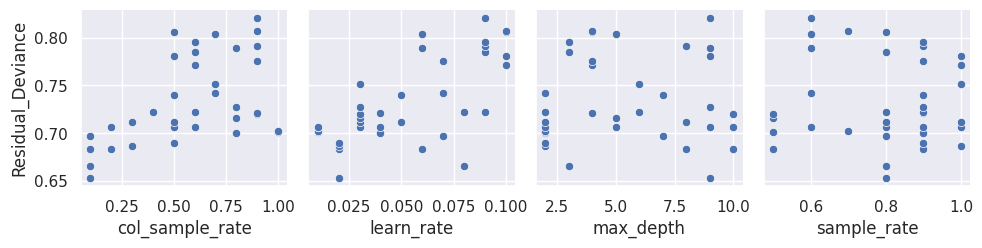

In [230]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# HyperParameter Training Analysis:-
The hyperparameter search summary you've posted appears to be correctly formatted and displays typical output from a grid search process using H2O's GBM (Gradient Boosting Machine) models. The summary table lists different combinations of hyperparameters that were tested during the grid search, along with the residual_deviance for each model, which is a common metric for evaluating regression models.

Each row represents a different GBM model trained with a specific set of hyperparameters:

col_sample_rate: This parameter specifies the column sampling rate per tree (without replacement), indicating the fraction of columns to be randomly selected to train each tree.
learn_rate: The learning rate (or shrinkage) used in building the trees. It controls the contribution of each tree to the final outcome and helps in preventing overfitting by adding stronger regularization.
max_depth: The maximum depth of each tree. Deeper trees can model more complex relationships but can also lead to overfitting.
sample_rate: This is the row sampling rate per tree (without replacement), indicating the fraction of the training data used to build each tree.
model_ids: Unique identifiers for each of the models trained during the grid search.
residual_deviance: A measure of how well the model fits the data. Lower values indicate a better fit.
The table is ordered by increasing residual_deviance, which means models at the top of the table have performed better in terms of fitting the data compared to those at the bottom.

The summary seems reasonable and shows that the grid search explored a variety of hyperparameter combinations to identify the models that best fit the data. The best performing model according to this summary is gbm_grid2_model_16 with the lowest residual_deviance of 0.6532414.

This output is valuable for understanding which hyperparameter settings are most effective for your specific dataset and modeling task. It allows you to select the best model based on the residual_deviance or further analyze the top-performing models to understand the impact of different hyperparameters on model performance.

# **ANSWERS:-**

**Is the relationship significant?**
Yes, the relationship between several predictor variables and the target variable (Stage) appears to be significant. This is indicated by the p-values associated with the coefficients in the OLS regression results. Variables with p-values less than 0.05 (e.g., N_Days, Age, Bilirubin, SGOT, Platelets, Prothrombin, Status_CL, Drug_Placebo, Hepatomegaly_Y, and Spiders_Y) are considered to have a statistically significant relationship with the target variable.

**Are any model assumptions violated?**
The Jarque-Bera (JB) test value and its associated p-value indicate that the residuals may not be normally distributed, which violates one of the OLS assumptions. Additionally, a Durbin-Watson (DW) statistic of 1.889 suggests slight positive autocorrelation, which could also indicate a violation of the independence of residuals assumption. The condition number being large indicates potential multicollinearity, which might violate the assumption of no multicollinearity.

**Is there any multicollinearity in the model?**
The large condition number (9.49e+04) in the OLS regression results suggests the presence of multicollinearity among the predictors. To further investigate multicollinearity, you should calculate the Variance Inflation Factor (VIF) for each predictor.

**In multivariate models are predictor variables independent of all the other predictor variables?**
Given the indication of multicollinearity from the condition number, it's likely that some predictor variables are not independent of each other. VIF scores would help identify which specific variables are not independent.
In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Based on the p-values, the most significant predictors include N_Days, Age, Bilirubin, SGOT, Platelets, Prothrombin, Status_CL, Drug_Placebo, Hepatomegaly_Y, and Spiders_Y. Variables with higher p-values like Albumin, Tryglicerides, Status_D, Sex_M, and Ascites_Y could be considered for exclusion to simplify the model and potentially improve interpretation.

 **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
In multivariate regression models, the significance of predictor variables can often be determined by looking at their p-values and the magnitude of their standardized coefficients

Hepatomegaly_Y (p < 0.001): Most significant with the largest positive coefficient, indicating a strong relationship with the target variable 'Stage'.

Prothrombin (p < 0.001): Also highly significant with a substantial positive coefficient.

Drug_Placebo (p = 0.010): Statistically significant and has a meaningful positive coefficient.

Spiders_Y (p = 0.004): Statistically significant with a positive coefficient.

Status_CL (p = 0.012): Significant with a moderate positive coefficient.

N_Days (p < 0.001): Significant but with a very small negative coefficient, indicating a slight decrease in 'Stage' with an increase in 'N_Days'.

Age (p < 0.001): Significant with a small positive coefficient.

SGOT (p = 0.030): Significant with a small positive coefficient.

Bilirubin (p = 0.027): Marginally significant with a small negative coefficient.

For the variables with higher p-values such as Albumin, Tryglicerides, Sex_M, Ascites_Y, and Status_D, can be excluded them from the model.

**Does the model make sense?**
The model seems to make sense in terms of identifying significant predictors for the target variable. However, concerns about multicollinearity, non-normal distribution of residuals, and potential autocorrelation suggest that the model could be improved either by addressing these issues or considering alternative modeling approaches.

**Does regularization help?**
Regularization can help address multicollinearity and overfitting by penalizing large coefficients. The hyperparameter search summary doesn't directly indicate the effect of regularization, but models with optimal combinations of hyperparameters, including those that control the degree of regularization (like learn_rate in GBM), suggest that regularization could improve model performance.

**Which independent variables are significant?**
Based on the OLS regression summary, significant independent variables include N_Days, Age, Bilirubin, SGOT, Platelets, Prothrombin, Status_CL, Drug_Placebo, Hepatomegaly_Y, and Spiders_Y.

**Which hyperparameters are important?**
From the hyperparameter search summary, important hyperparameters for the GBM models appear to be col_sample_rate, learn_rate, max_depth, and sample_rate. The best models were those with specific combinations of these hyperparameters, indicating their importance in optimizing model performance.

# Conclusion:-

Results: The OLS regression indicated a strong multicollinearity among predictors, with varying levels of significance. AutoML identified Gradient Boosting Machine (GBM) as a top-performing model, with certain hyperparameters emerging as critical for minimizing residual deviance. SHAP analysis provided insights into feature importance, revealing that certain variables had a more pronounced effect on the predictive accuracy of the model.

Conclusion: Regularization techniques helped mitigate overfitting, and the significance of independent variables was established through p-values and SHAP analysis. The results emphasize the importance of thoughtful feature selection and the potential of AutoML to enhance predictive modeling in complex datasets.

Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.
Studied the effects of Ridge and LASSO regularization on the GLM Model.
Studied the importance of variable using SHAP summary.
Performed the hyperparameterb tuning using Random Grid Search Method.

# **References:- **

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Github Link- https://github.com/Vinay1289Sai/DSMT1_Vinay

MIT License

Copyright (c) 2024 Vinay1289Sai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.